# STINTSY Machine Project - Group 5 (S18)
**Members:**

Argamosa, Daniel Cedric

Cabinbin, Pierre Genric

Kua, Miguel Carlo

Sang, Nathan Immanuel



## 1. Introduction to the Problem and Dataset
In this Notebook, we will be exploring and analyzing a dataset about [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/data) from the website Kaggle, which provides insights into the social, demographic, and academic characteristics of secondary school students. The dataset was obtained from a survey conducted on students from Portuguese secondary schools who were enrolled in Math and Portuguese language courses, offering a rich foundation for exploring the factors that influence academic performance.

The primary goal is to examine how various factors, including family background, lifestyle, and alcohol consumption, relate to the culmination of their academic performance, their final grades, becoming a regression-focused study. Afterwards, another test would be finding out how big does alcohol consumption rank between all those factors. So by applying regression analysis, we aim to uncover the extent to which factors like alcohol consumption, family relationships, and study habits predict students' final grades, allowing us to quantify their impact.

For more context, in Portugal, alcohol consumption is an accepted part of the culture, and drinking is often integrated into social events from a young age. Unlike in some other countries where alcohol consumption is more strictly regulated for minors, Portugal has a tradition of moderate drinking, which is often seen in social gatherings and family events. Furthermore, Portugal’s educational system places a strong emphasis on both academic and social development, with a focus on well-rounded education.

This dataset provides a unique opportunity to study these complex interactions, as it includes not only demographic and academic data but also lifestyle and health information. In other words, the nature of this dataset which encompasses factors from family relationships, study habits to alcohol consumption, allows for a deep dive into how different factors impact academic performance that could be used for educational practices in addressing the relationship between lifestyle choices and academic success.

## 2. Description of the Dataset

The dataset consists of data collected from secondary school students in Portugal having a variety of demographic, academic, lifestyle, and health-related information. Specifically, the dataset surveys students enrolled in Math and Portuguese language courses, providing insights into factors that may influence their academic performance. Key attributes include family background, social habits, lifestyle choices, and alcohol consumption. The purpose of this dataset is to examine how these factors correlate with students' final grades in their courses, offering a comprehensive look at the influences on academic success.

For more context, in Portugal, alcohol consumption is an accepted part of the culture, and drinking is often integrated into social events from a young age. Unlike in some other countries where alcohol consumption is more strictly regulated for minors, Portugal has a tradition of moderate drinking, which is often seen in social gatherings and family events. Furthermore, Portugal’s educational system places a strong emphasis on both academic and social development, with a focus on well-rounded education.This dataset provides a unique opportunity to study these complex interactions, as it includes not only demographic and academic data but also lifestyle and health information. In other words, the nature of this dataset which encompasses factors from family relationships, study habits to alcohol consumption, allows for a deep dive into how different factors impact academic performance that could be used for educational practices in addressing the relationship between lifestyle choices and academic success.

The dataset was created by combining two separate datasets: one for students enrolled in Math and another for students enrolled in Portuguese. After concatenating both, the new dataset has **1044** instances, from 395 Math instances and 649 Portuguese instances. For the structure of the dataset itself, each row represents a single student’s information, while each column represents a feature about the student, such as their demographic details, family background, alcohol consumption habits, academic performance, and more totaling to **33** unique features.

Here’s a breakdown of all the columns:

1. **Personal and Demographic Details:**
   - `school` - The school attended by the student (e.g., "GP" for Gabriel Pereira, "MS" for Mousinho da Silveira).
   - `sex` - Gender of the student ("F" for female, "M" for male).
   - `age` - Age of the student in years.
   - `address` - Type of student’s home location ("U" for urban, "R" for rural).
   - `famsize` - Family size indicator ("LE3" for families with three or fewer members, "GT3" for families with more than three).

2. **Family Background:**
   - `Pstatus` - Parent's cohabitation status ("T" for living together, "A" for apart).
   - `Medu` - Mother's education level (numeric: 0-4).
   - `Fedu` - Father's education level (numeric: 0-4).
   - `Mjob` - Mother's job (nominal: "teacher", "health", "services", "at_home", "other").
   - `Fjob` - Father's job (nominal: "teacher", "health", "services", "at_home", "other").
   - `reason` - Reason for choosing the school ("home", "reputation", "course", "other").
   - `guardian` - Parent/guardian education level (nominal: "mother", "father", "other").

3. **Lifestyle and Personal Preferences:**
   - `traveltime` - Time taken to travel to school (numeric: 1-4).
   - `studytime` - Weekly study time (numeric: 1-4).
   - `failures` - Number of past class failures (numeric: 0-4).
   - `schoolsup` - Extra educational support (binary: "yes" or "no").
   - `famsup` - Family educational support (binary: "yes" or "no").
   - `paid` - Extra paid classes within the course subject (binary: "yes" or "no").
   - `activities` - Participation in extracurricular activities (binary: "yes" or "no").
   - `nursery` - Attended nursery school (binary: "yes" or "no").
   - `higher` - Intention to pursue higher education (binary: "yes" or "no").
   - `internet` - Internet access at home (binary: "yes" or "no").
   - `romantic` - With a romantic relationship (binary: "yes" or "no").

4. **Social and Family Relations:**
   - `famrel` - Quality of family relationships (numeric: 1-5).
   - `freetime` - Amount of free time after school (numeric: 1-5).
   - `goout` - Frequency of going out with friends (numeric: 1-5).

5. **Health and Substance Use:**
   - `Dalc` - Workday alcohol consumption (numeric: 1-5).
   - `Walc` - Weekend alcohol consumption (numeric: 1-5).
   - `health` - Current health status (numeric: 1-5).

6. **Academic Performance:**
   - `absences` - Number of school absences (numeric: 0-93).
   - `G1` - First period grade (numeric: 0-20).
   - `G2` - Second period grade (numeric: 0-20).
   - `G3` - Final grade (numeric: 0-20, output target).

## 3. List of Libraries Required

For this project, the following Python libraries have been utilized:

- `pandas`: For efficient data handling and manipulation, allowing for easy loading, processing, and analysis of the dataset.
- `numpy`: For numerical computations and handling array-type data structures, essential for mathematical operations on data.
- `seaborn`: For data visualization, providing a high-level interface for drawing attractive and informative statistical graphics.
- `matplotlib.pyplot`: For creating static, animated, and interactive visualizations, used for visual exploration of data patterns.
- `scikit-learn`: For implementing and evaluating various machine learning models, such as regression models, classification, and clustering, essential for predictive analysis.


## 4. Data Cleaning

This process will add a feature named ``subject`` to both datasets, 0 for Math, 1 for Portuguese before concatenating them, making it ready to be subjected to more data cleaning techniques

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
student_mat = pd.read_csv('student-mat.csv')  # Replace with your actual file path
student_por = pd.read_csv('student-por.csv')  # Replace with your actual file path

# Add a new column to indicate the source (0 for math, 1 for Portuguese)
student_mat['subject'] = 0  # 0 for Math
student_por['subject'] = 1  # 1 for Portuguese

# Concatenate the datasets
df_student = pd.concat([student_mat, student_por], ignore_index=True)

# Display the shape of the cleaned dataset
print(f"Shape of Combined Dataset (After Removing Duplicates, excluding 'subject'): {df_student.shape}")


Shape of Combined Dataset (After Removing Duplicates, excluding 'subject'): (1044, 34)


Because there is a chance that some students may have been enrolled in both Math and Portuguese classes, we will drop duplicate rows according to features based on their personal details and family background

In [2]:

print(f"Shape After Before Duplicates: {df_student.shape}")

# Define the columns based on which duplicates will be dropped
merge_columns = [
    "school", "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob"
]

# Drop duplicate rows based on the selected columns
df_student.drop_duplicates(subset=merge_columns, inplace=True)

print(f"Shape After Dropping Duplicates: {df_student.shape}")

Shape After Before Duplicates: (1044, 34)
Shape After Dropping Duplicates: (613, 34)


Next we would, standardize all entries by removing whitespaces and making all string texts to lowercase for consistency

In [3]:
for col in df_student.select_dtypes(include=['object']).columns:
    df_student[col] = df_student[col].str.strip().str.lower()

print("Features (Before):")
print(df_student.columns.tolist(), "\n")

Features (Before):
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject'] 



Then we would label encode all forms of binary data for easier representation

In [4]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'nursery', 'internet', 
               'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'romantic']

label_encoder = LabelEncoder()

for col in binary_cols:
    if col in df_student.columns:
        df_student[col] = label_encoder.fit_transform(df_student[col])

Similarly, we would perform One Hot Encoding to all nominal data, making them become new features with binary values

In [5]:
multi_class_cols = ['Mjob', 'Fjob', 'reason']
df_student = pd.get_dummies(df_student, columns=multi_class_cols, drop_first=True)

Then, we would convert boolean values to integer values, and check if they're all numerical values

In [6]:
df_student = df_student.applymap(lambda x: 1 if x is True else (0 if x is False else x))

all_numeric = all([pd.api.types.is_numeric_dtype(df_student[col]) for col in df_student.columns])
print("All columns are numeric:", all_numeric)

All columns are numeric: True


C:\Users\rapid\AppData\Local\Temp\ipykernel_21428\3288596315.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_student = df_student.applymap(lambda x: 1 if x is True else (0 if x is False else x))


General Information:

In [7]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 1037
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             613 non-null    int64
 1   sex                613 non-null    int64
 2   age                613 non-null    int64
 3   address            613 non-null    int64
 4   famsize            613 non-null    int64
 5   Pstatus            613 non-null    int64
 6   Medu               613 non-null    int64
 7   Fedu               613 non-null    int64
 8   guardian           613 non-null    int64
 9   traveltime         613 non-null    int64
 10  studytime          613 non-null    int64
 11  failures           613 non-null    int64
 12  schoolsup          613 non-null    int64
 13  famsup             613 non-null    int64
 14  paid               613 non-null    int64
 15  activities         613 non-null    int64
 16  nursery            613 non-null    int64
 17  higher             6

In [8]:
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation
0,0,0,18,1,0,0,4,4,1,2,...,0,0,0,0,0,0,1,0,0,0
1,0,0,17,1,0,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,15,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,15,1,0,1,4,2,1,1,...,0,0,0,0,0,1,0,1,0,0
4,0,0,16,1,0,1,3,3,0,1,...,1,0,0,0,1,0,0,1,0,0


In [9]:
df_student.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation
1005,1,0,19,0,0,0,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
1006,1,0,18,0,0,1,2,2,1,2,...,0,1,0,0,1,0,0,1,0,0
1013,1,0,18,0,1,0,1,2,1,3,...,0,0,0,0,1,0,0,0,0,0
1027,1,0,19,0,0,1,1,1,2,2,...,0,0,0,0,1,0,0,0,0,0
1037,1,0,17,1,0,1,4,3,1,2,...,0,0,1,0,1,0,0,0,1,0


In [10]:
df_student.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.350734,0.412724,16.827080,0.691680,0.324633,0.866232,2.502447,2.306688,0.862969,1.572594,...,0.381729,0.221860,0.106036,0.039152,0.554649,0.278956,0.053834,0.231648,0.107667,0.221860
std,0.477590,0.492726,1.283168,0.462177,0.468620,0.340681,1.141354,1.099868,0.552016,0.747566,...,0.486207,0.415837,0.308135,0.194114,0.497410,0.448852,0.225873,0.422230,0.310213,0.415837
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Lastly, we would check for any missing values, and if there were any deal with them appropriately

In [11]:
df_student.isnull().sum()

school               0
sex                  0
age                  0
address              0
famsize              0
Pstatus              0
Medu                 0
Fedu                 0
guardian             0
traveltime           0
studytime            0
failures             0
schoolsup            0
famsup               0
paid                 0
activities           0
nursery              0
higher               0
internet             0
romantic             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
G1                   0
G2                   0
G3                   0
subject              0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_home          0
reason_other         0
reason_reputation    0
dtype: int64

In [12]:
# df_student.to_csv('df_student.csv', index=False)


## 5. Exploratory Data Analysis


# In this section, we will conduct an Exploratory Data Analysis to gain a deeper understanding of our "Student Alchohol Consumption" dataset. Here are some questions we aim to answer:

# 1. Which features have the strongest impact on the final grade (G3)?
# 2. What is the relationship between alcohol consumption and academic performance?

First, we use visualizations and the describe() method in pandas to summarize the dataset's numerical features, highlighting central tendencies, dispersion, and distribution patterns.

In [13]:
df_student.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.350734,0.412724,16.827080,0.691680,0.324633,0.866232,2.502447,2.306688,0.862969,1.572594,...,0.381729,0.221860,0.106036,0.039152,0.554649,0.278956,0.053834,0.231648,0.107667,0.221860
std,0.477590,0.492726,1.283168,0.462177,0.468620,0.340681,1.141354,1.099868,0.552016,0.747566,...,0.486207,0.415837,0.308135,0.194114,0.497410,0.448852,0.225873,0.422230,0.310213,0.415837
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature Distributions

Histograms reveal the distribution of values for each feature, offering valuable insights.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

n_features = len(df_student.columns)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df_student.columns):
    # Plot histogram
    data = df_student[column]
    axes[i].hist(data, bins=15, color='skyblue', edgecolor='black', density=True, alpha=0.6)
    
    # Calculate mean and std dev for normal distribution curve
    mean, std = np.mean(data), np.std(data)
    
    # Generate normal distribution curve
    x = np.linspace(data.min(), data.max(), 100)
    y = norm.pdf(x, mean, std)
    
    # Plot normal distribution curve
    axes[i].plot(x, y, color='red', linewidth=2, label='Normal Curve')
    axes[i].set_title(column)
    axes[i].legend()

# Remove unused axes
for j in range(len(df_student.columns), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Histograms with Normal Distribution Curves', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

We can assess the distribution of each dataset feature by performing a skewness test, which evaluates the asymmetry of the data. A skewness value of 0 signifies a perfectly symmetrical distribution. Positive skewness indicates a right-skewed distribution, while negative skewness suggests a left-skewed distribution.

In [ ]:
from scipy.stats import skew
import pandas as pd

pd.set_option('display.max_rows', None)

numeric_columns = df_student.select_dtypes(include=['int64', 'float64']).columns

skewness_results = {column: skew(df_student[column]) for column in numeric_columns}

skewness_df = pd.DataFrame(list(skewness_results.items()), columns=['Feature', 'Skewness'])

print(skewness_df)

pd.reset_option('display.max_rows')

              Feature  Skewness
0              school  0.625591
1                 sex  0.354546
2                 age  0.417901
3             address -0.830145
4             famsize  0.749052
5             Pstatus -2.151752
6                Medu -0.032421
7                Fedu  0.212820
8            guardian -0.055980
9          traveltime  1.254160
10          studytime  0.699714
11           failures  2.352275
12          schoolsup  2.531509
13             famsup -0.451543
14               paid  0.914890
15         activities  0.075094
16            nursery -1.432822
17             higher -2.559176
18           internet -1.305113
19           romantic  0.544398
20             famrel -1.095575
21           freetime -0.197965
22              goout -0.003541
23               Dalc  2.115592
24               Walc  0.618086
25             health -0.471450
26           absences  3.823399
27                 G1  0.322198
28                 G2 -0.378030
29                 G3 -0.768634
30      

Upon analyzing the histograms and skewness results, the distribution of features in the dataset demonstrates a tendency toward right-skewed distributions, characterized by longer right tails. This is supported by positive skewness values for features such as 'famsize', 'traveltime', 'studytime', 'failures', 'schoolsup', 'Dalc', 'Walc', 'absences', 'paid', 'Mjob_health', 'Mjob_services', 'reason_home', 'reason_other', and 'Fjob_teacher'.

Conversely, some features exhibit left-skewed distributions, with longer left tails. These include 'address', 'Pstatus', 'nursery', 'higher', 'internet', 'famrel', and 'health'. Features with skewness values close to zero, such as 'sex', 'age', 'Medu', 'Fedu', 'guardian', 'activities', 'goout', 'G1', and 'G2', suggest relatively symmetrical distributions.



## Box Plot Analysis

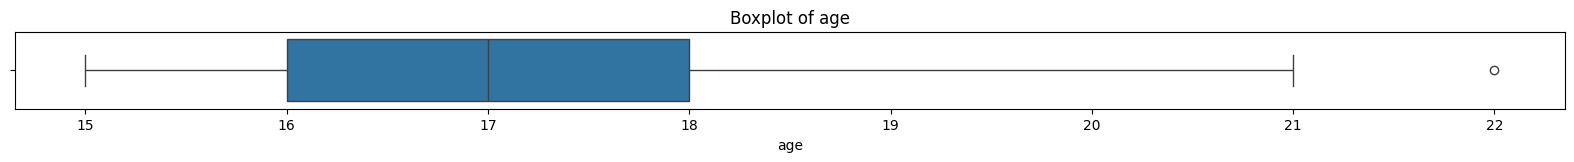

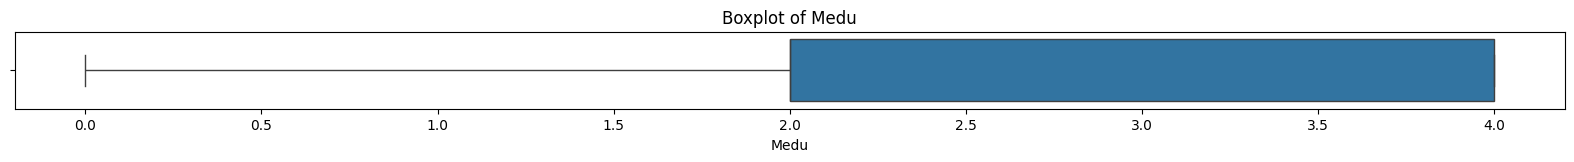

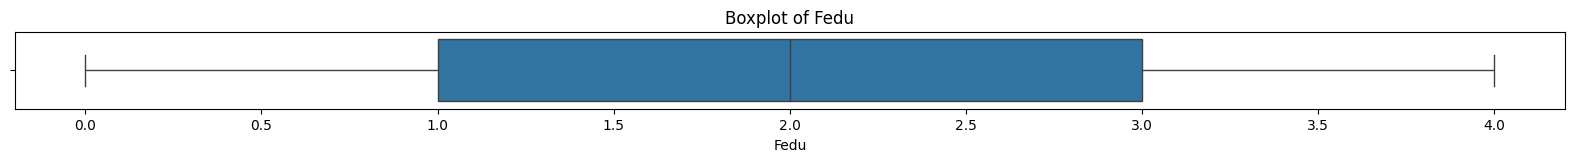

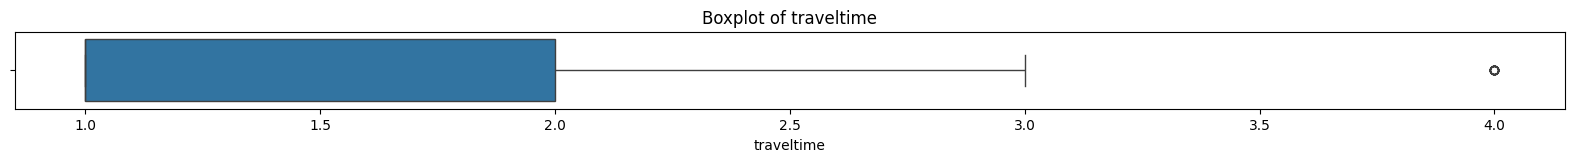

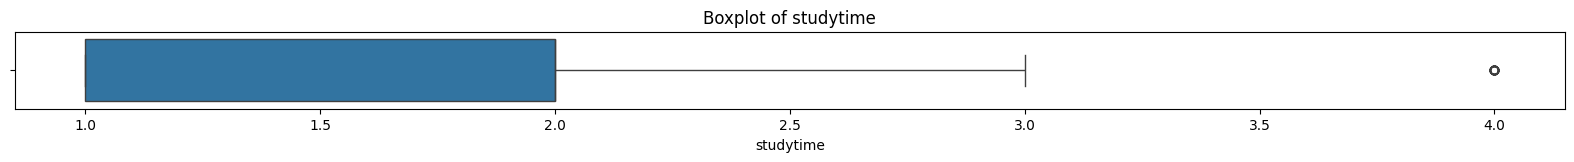

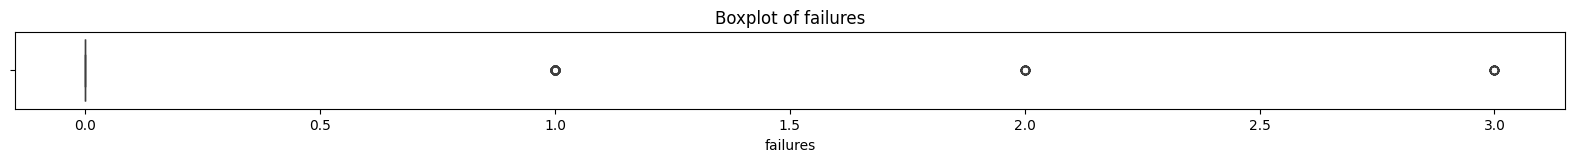

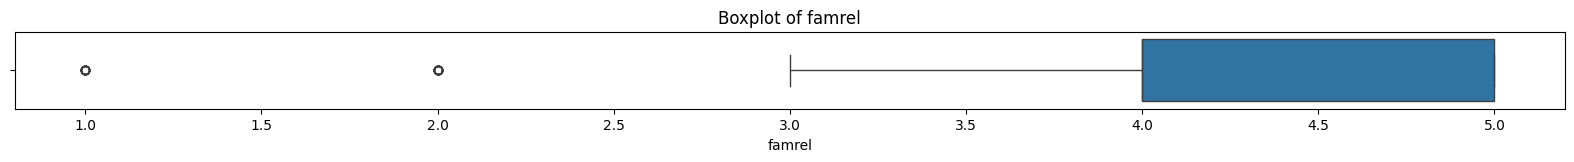

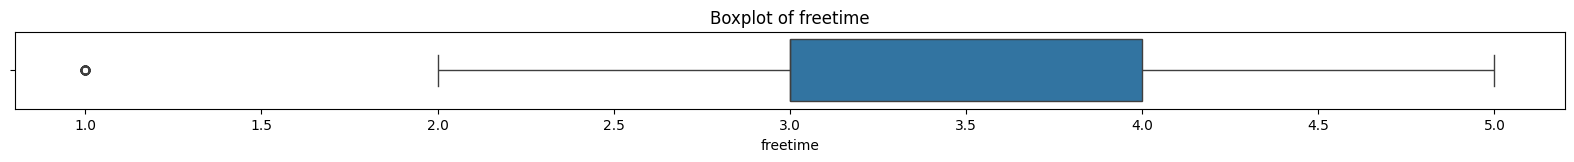

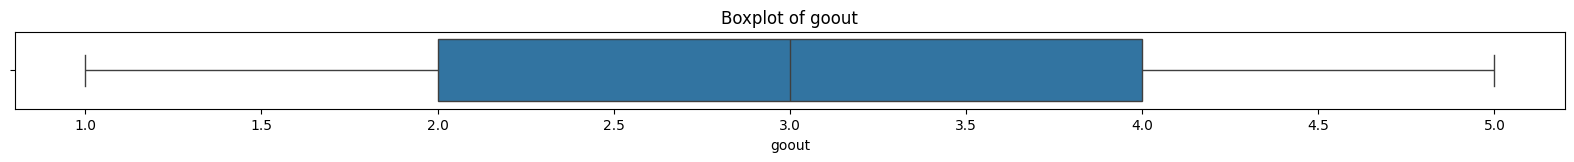

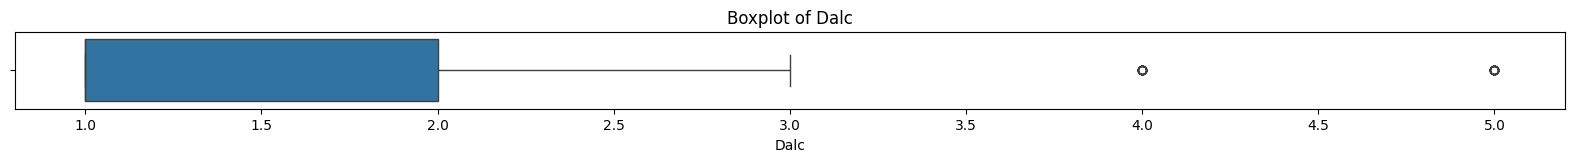

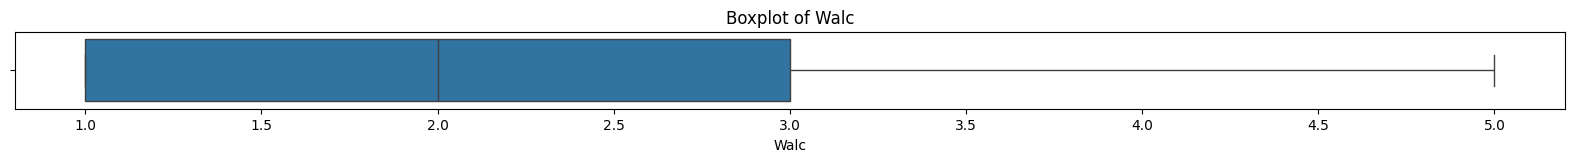

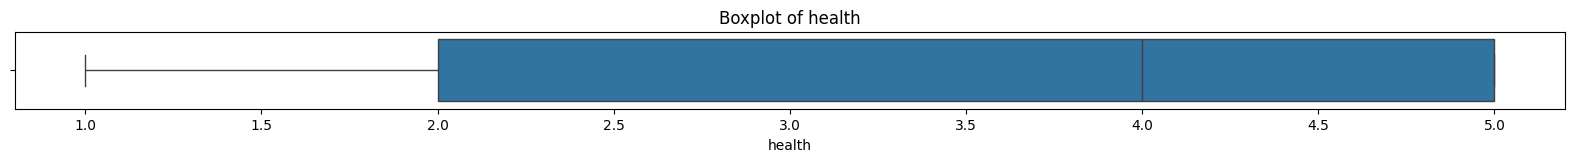

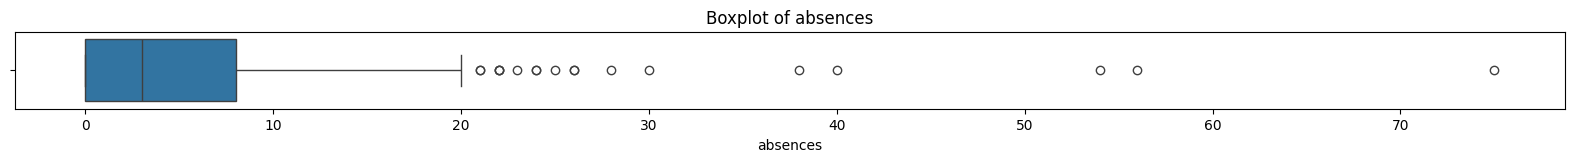

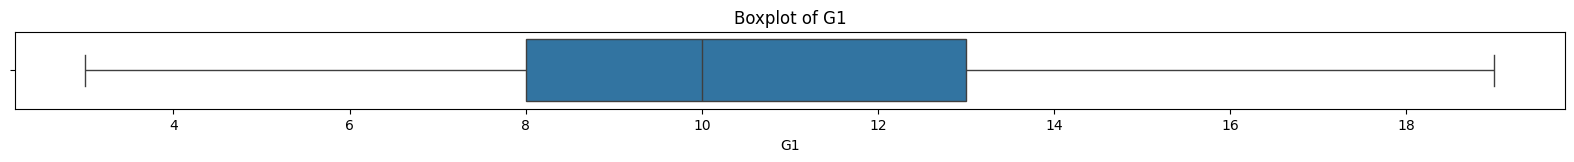

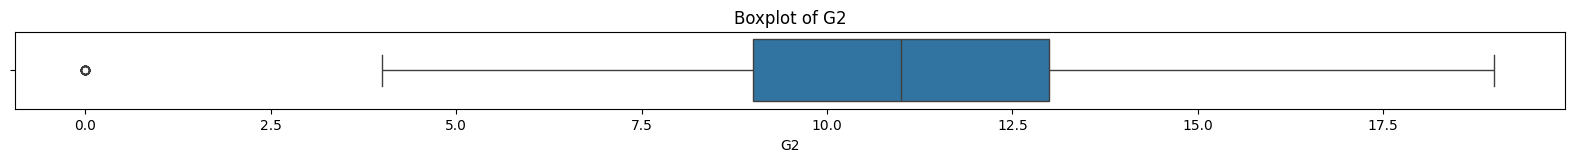

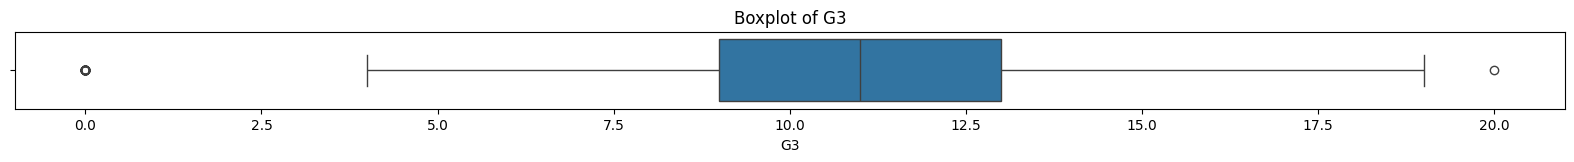

In [ ]:
numeric_features=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']

for feature in numeric_features:
    plt.figure(figsize=(20,1))
    sns.boxplot(x=df_student[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

## Correlation Analysis

In [ ]:
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

numeric_df = df_student[numeric_features].copy()

# Calculate the correlation matrix and print it
corr_matrix = numeric_df.corr()
print(corr_matrix)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.115743 -0.120977    0.007997   0.004441  0.296321   
Medu       -0.115743  1.000000  0.624183   -0.236237   0.102239 -0.164609   
Fedu       -0.120977  0.624183  1.000000   -0.190078   0.040185 -0.169679   
traveltime  0.007997 -0.236237 -0.190078    1.000000  -0.058990  0.068882   
studytime   0.004441  0.102239  0.040185   -0.058990   1.000000 -0.125660   
failures    0.296321 -0.164609 -0.169679    0.068882  -0.125660  1.000000   
famrel     -0.013133  0.005450  0.021285    0.000464   0.013550 -0.073113   
freetime    0.007489 -0.016001  0.008403   -0.003233  -0.075427  0.090668   
goout       0.102818  0.034358  0.061039    0.053524  -0.101479  0.048008   
Dalc        0.145094 -0.016416 -0.009001    0.082319  -0.142115  0.101161   
Walc        0.069797 -0.042859  0.026827    0.066138  -0.233137  0.098107   
health     -0.019944 -0.014816  0.034434   -0.030531  -0.054676  0.048239   

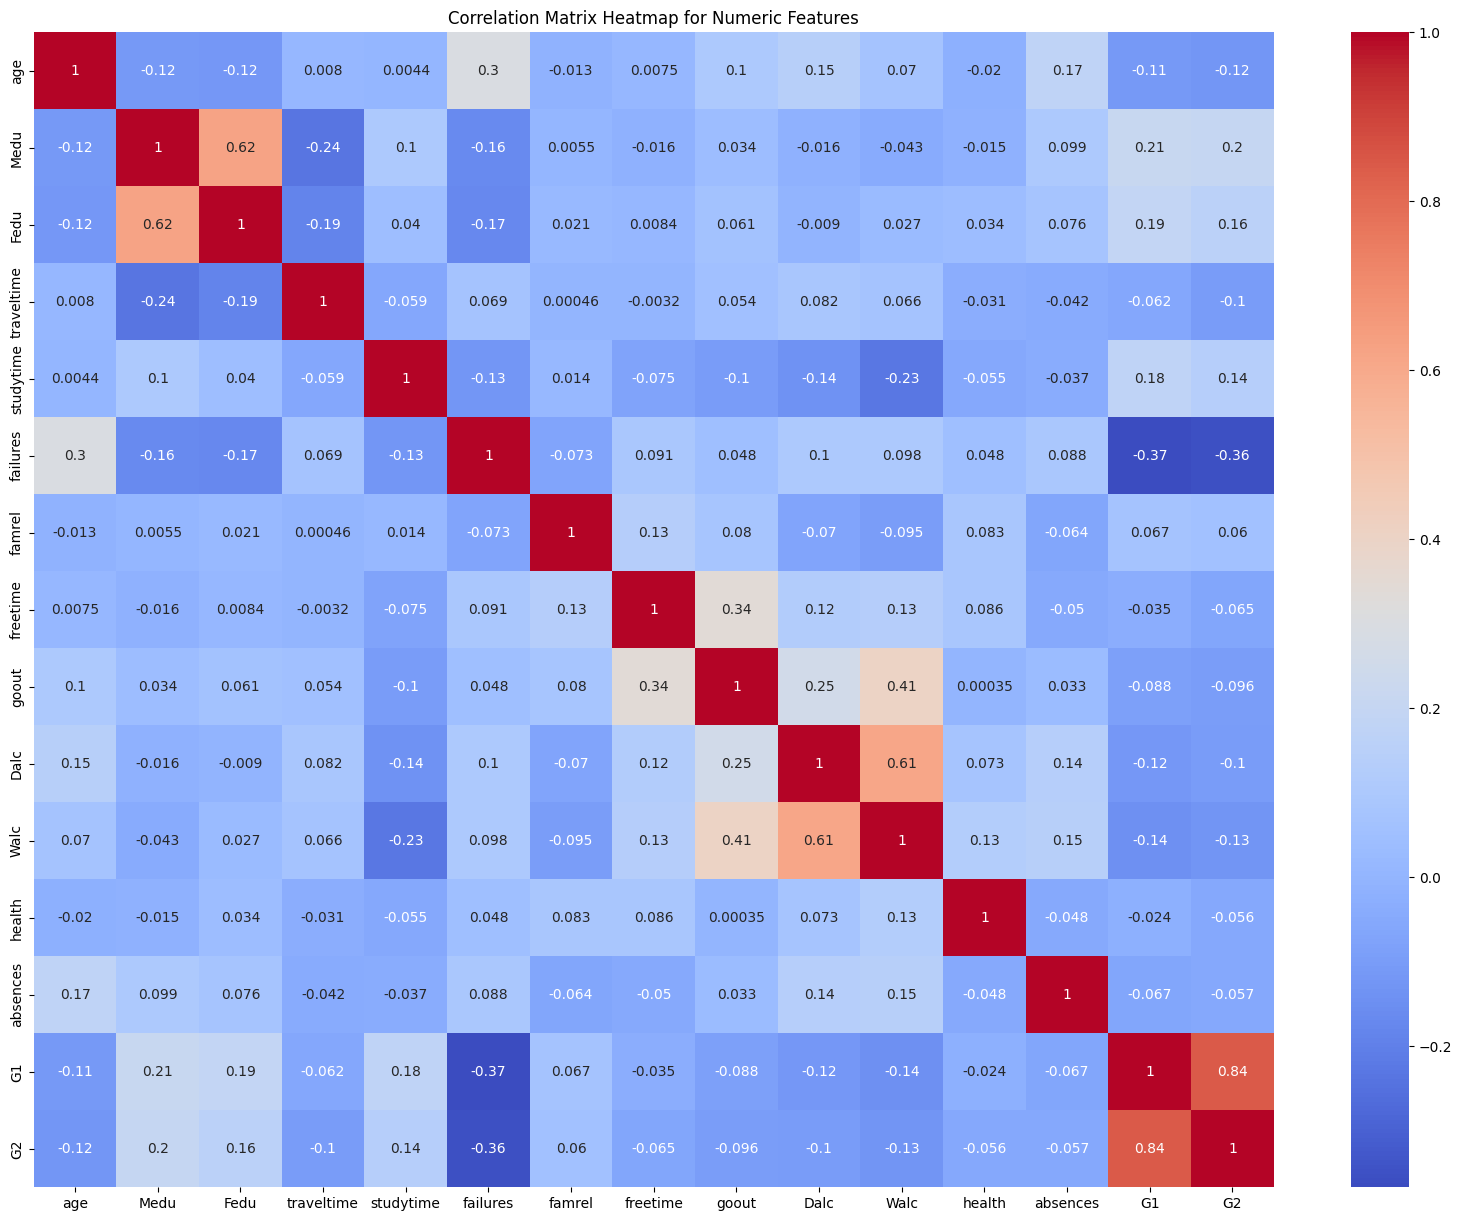

    Feature 1 Feature 2  Correlation
209        G1        G2     0.844777
223        G2        G1     0.844777


In [ ]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, cbar=True)
plt.title("Correlation Matrix Heatmap for Numeric Features")
plt.show()

# Extract significant correlations (correlation > 0.8 or < -0.8)
significant_correlations = corr_matrix.unstack().reset_index()
significant_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter out self-correlations and keep only strong correlations
significant_correlations = significant_correlations[
    (abs(significant_correlations['Correlation']) > 0.8) & (significant_correlations['Feature 1'] != significant_correlations['Feature 2'])
]

# Sort the correlations by their absolute value
significant_correlations_sorted = significant_correlations.sort_values(by='Correlation', ascending=False)

# Show the sorted significant correlations
print(significant_correlations_sorted)


In [ ]:
significant_correlations_sorted['Pair'] = significant_correlations_sorted.apply(
    lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1
)

unique_pairs = significant_correlations_sorted.drop_duplicates(subset='Pair').drop(columns=['Pair'])

display(unique_pairs)

,Feature 1,Feature 2,Correlation
209,G1,G2,0.844777


In [ ]:
# Compute the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set a threshold for high correlation
threshold = 0.8

# Identify features to drop, keeping the one with the highest correlation to the target
features_to_drop = set()
for column in upper_triangle.columns:
    # Find features highly correlated with the current column
    high_corr_features = upper_triangle.index[upper_triangle[column] > threshold].tolist()
    # Exclude the column itself and add others to the drop list
    features_to_drop.update(high_corr_features)

# Keep the most relevant feature (`G2`) and remove others (`G1`)
# We drop G1 as its correlation is to 0.8
features_to_drop = features_to_drop - {'G3'}

# Drop the selected features
numeric_df_dropped = numeric_df.drop(columns=features_to_drop)
df_student = df_student.drop(columns=features_to_drop)

# Recalculate the correlation matrix for the reduced numeric dataset
corr_matrix_dropped = numeric_df_dropped.corr()

# Display results
print("Dropped Features:", features_to_drop)

# df_student
# the new dataset is within df_student

Dropped Features: {'G1'}


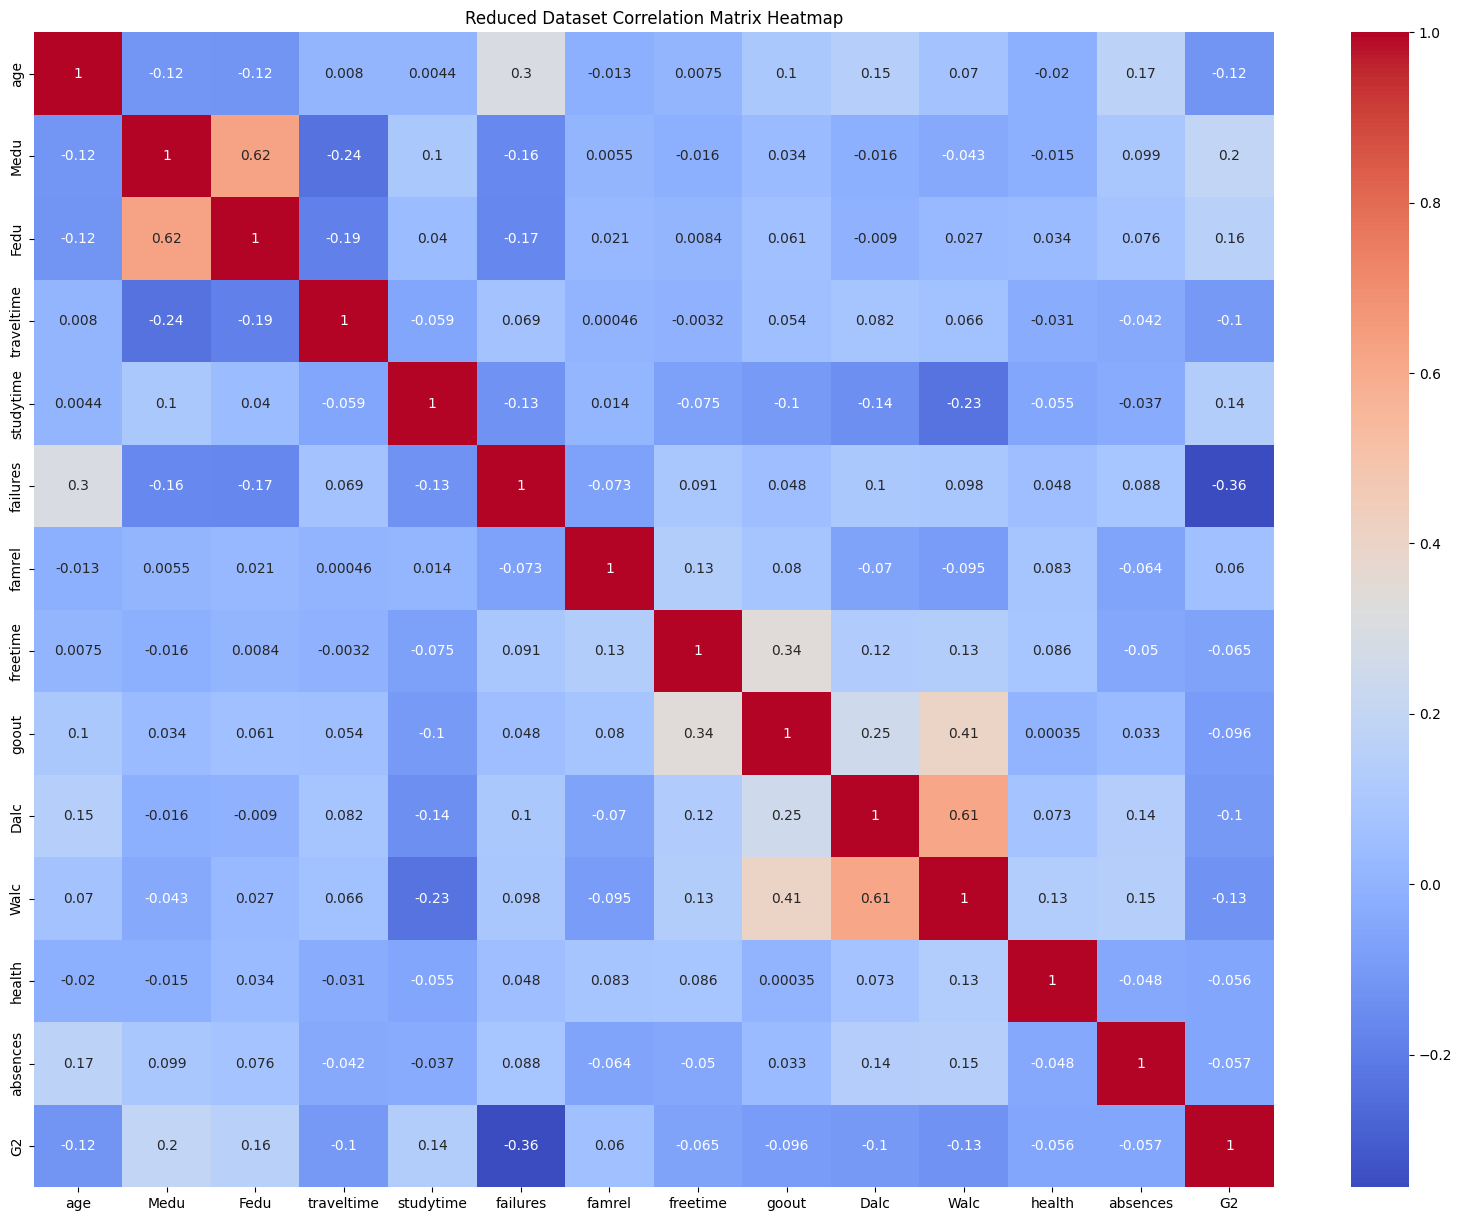

In [ ]:
# Plot the new heatmap for the reduced dataset
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix_dropped, cmap='coolwarm', annot=True, cbar=True)
plt.title("Reduced Dataset Correlation Matrix Heatmap")
plt.show()

# Identify significant correlations
significant_correlations_dropped = corr_matrix_dropped.unstack().reset_index()
significant_correlations_dropped.columns = ['Feature 1', 'Feature 2', 'Correlation']
significant_correlations_dropped = significant_correlations_dropped[
    (abs(significant_correlations_dropped['Correlation']) > 0.8) & 
    (significant_correlations_dropped['Feature 1'] != significant_correlations_dropped['Feature 2'])
]

# Sort by absolute correlation values
significant_correlations_sorted_dropped = significant_correlations_dropped.sort_values(by='Correlation', ascending=False)

## 6. Model Training

This chapter focuses on the application of machine learning models to predict the **final grade (G3)** of students based on various features provided in the dataset. The objective is to explore, train, and evaluate multiple predictive models, comparing their performance and interpretability to identify the most suitable approach for this task. 

The models we will train and evaluate include **Decision Tree Regressor**, **Random Forest Regressor**, and **Linear Regression**. Each model offers unique strengths, making it valuable to our analysis.

---

## Objective of This Chapter

The primary goal of this chapter is to:
1. Train and evaluate **Decision Tree**, **Random Forest**, and **Linear Regression** models.
2. Compare their performance using metrics such as **Mean Squared Error (MSE)**, **R-squared (R²)**, and **Mean Absolute Error (MAE)**.
3. Provide visual and statistical insights into how these models predict the final grade (`G3`) and determine the importance of different features in the dataset.

By leveraging these models, we aim to understand the factors influencing academic performance and identify the best predictive approach for this task.


## Linear Regression

**Linear Regression** is a simple and interpretable machine learning algorithm that models the relationship between the target variable (`G3`) and the features as a linear equation. It assumes that the target variable is a weighted sum of the features plus an intercept.

### Why Linear Regression is Used:
- **Interpretability**: The coefficients of the linear regression model provide insights into the relationship between each feature and the target variable.
- **Baseline Comparison**: Linear Regression serves as a baseline model to compare with more complex models like Decision Tree and Random Forest.
- **Simplicity**: It is computationally efficient and works well when the relationship between features and the target is approximately linear.

### Example of Use:
In our project, Linear Regression will provide a baseline prediction of `G3` based on features such as study time and parental education, allowing us to assess the improvement offered by more complex models.

##### 1. First process in computing for the linear regression model is to first prepare the necessary variables: `X` and `y`, for initial training.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr_data = df_student.copy()

X_lr = lr_data.drop(columns=['G3'])
y_lr = lr_data['G3']

##### 2. Split the data variables suited for testing and training datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

##### 3. Initialize the Linear Regression Model

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

##### 4. Plot the Linear Regression Model

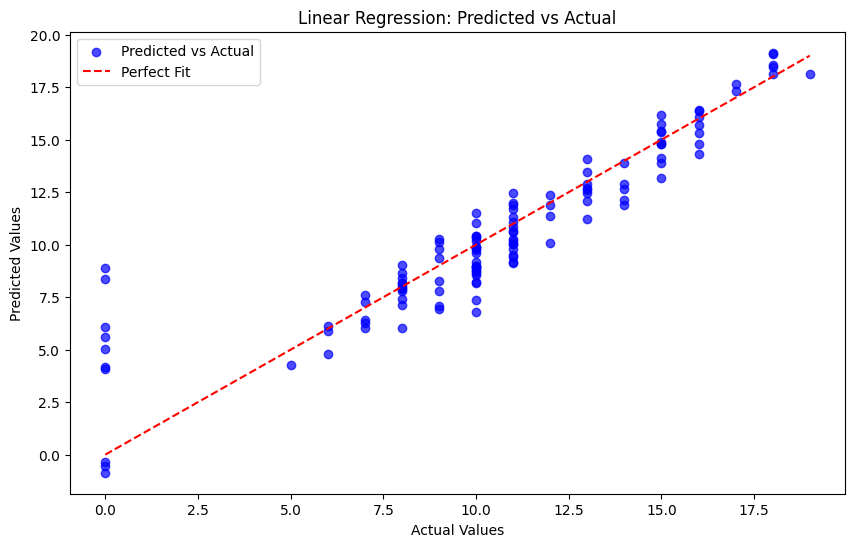

In [ ]:
y_pred = lr_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Perfect Fit')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

##### **Explanation**: As observed in the graph above, majority of the actual values (X) are adjacent to the red dotted line. However, there are evident outliers from this graph, indicating that there are features that the model is struggling to generalize. Hence, there is a high correlation between the features aside from G3 and G3 itself, making it impactful to the final grade of the students.

## Decision Trees

A **Decision Tree** is a versatile and interpretable machine learning algorithm that splits the dataset into branches based on feature thresholds, creating a tree-like structure. At each split (node), the algorithm chooses the feature and threshold that minimize prediction error. 

### Why Decision Tree is Used:
- **Interpretability**: The tree structure makes it easy to visualize and understand the decision-making process.
- **Ability to Capture Non-Linear Relationships**: Decision Trees can model non-linear patterns effectively by dividing the feature space into regions.
- **Suitability for the Dataset**: The features in the dataset, such as **study time** or **family relationships**, may have complex interactions with the target variable (G3), which a Decision Tree can capture.

### Example of Use:
In our project, the Decision Tree model will predict the final grade (`G3`) by iteratively splitting the data on features such as parental education or alcohol consumption, revealing how these factors influence academic performance.

##### 1. First process in computing for the decision tree is to first prepare the necessary variables: `X` and `y`, for initial training.

In [ ]:
tree_data = df_student.copy()

X_tree = tree_data.drop(columns=['G3']) 
y_tree = tree_data['G3'] 

##### 2. Then, the dataset itself is split into train and test sets, with a modification to remove y's extra dimension.

In [ ]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.3, random_state=42)

y_train_tree = np.squeeze(y_train_tree)
y_test_tree = np.squeeze(y_test_tree)

##### 3. Afterwards, the Decision Tree model is built and trained to predict the final grade, with initial hyperparameters optimized to balance complexity and generalization by limiting tree depth, requiring a minimum number of samples for splits, and ensuring adequate leaf node size.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(
    min_impurity_decrease=0.001, 
    max_depth=20,               
    min_samples_split=10,       
    min_samples_leaf=5,         
    max_features="sqrt",       
    splitter="best", 
    random_state=42             
)

dtr.fit(X_train_tree, y_train_tree)

DecisionTreeRegressor(max_depth=20, max_features='sqrt',
                      min_impurity_decrease=0.001, min_samples_leaf=5,
                      min_samples_split=10, random_state=42)

##### 4. Plot the decision tree

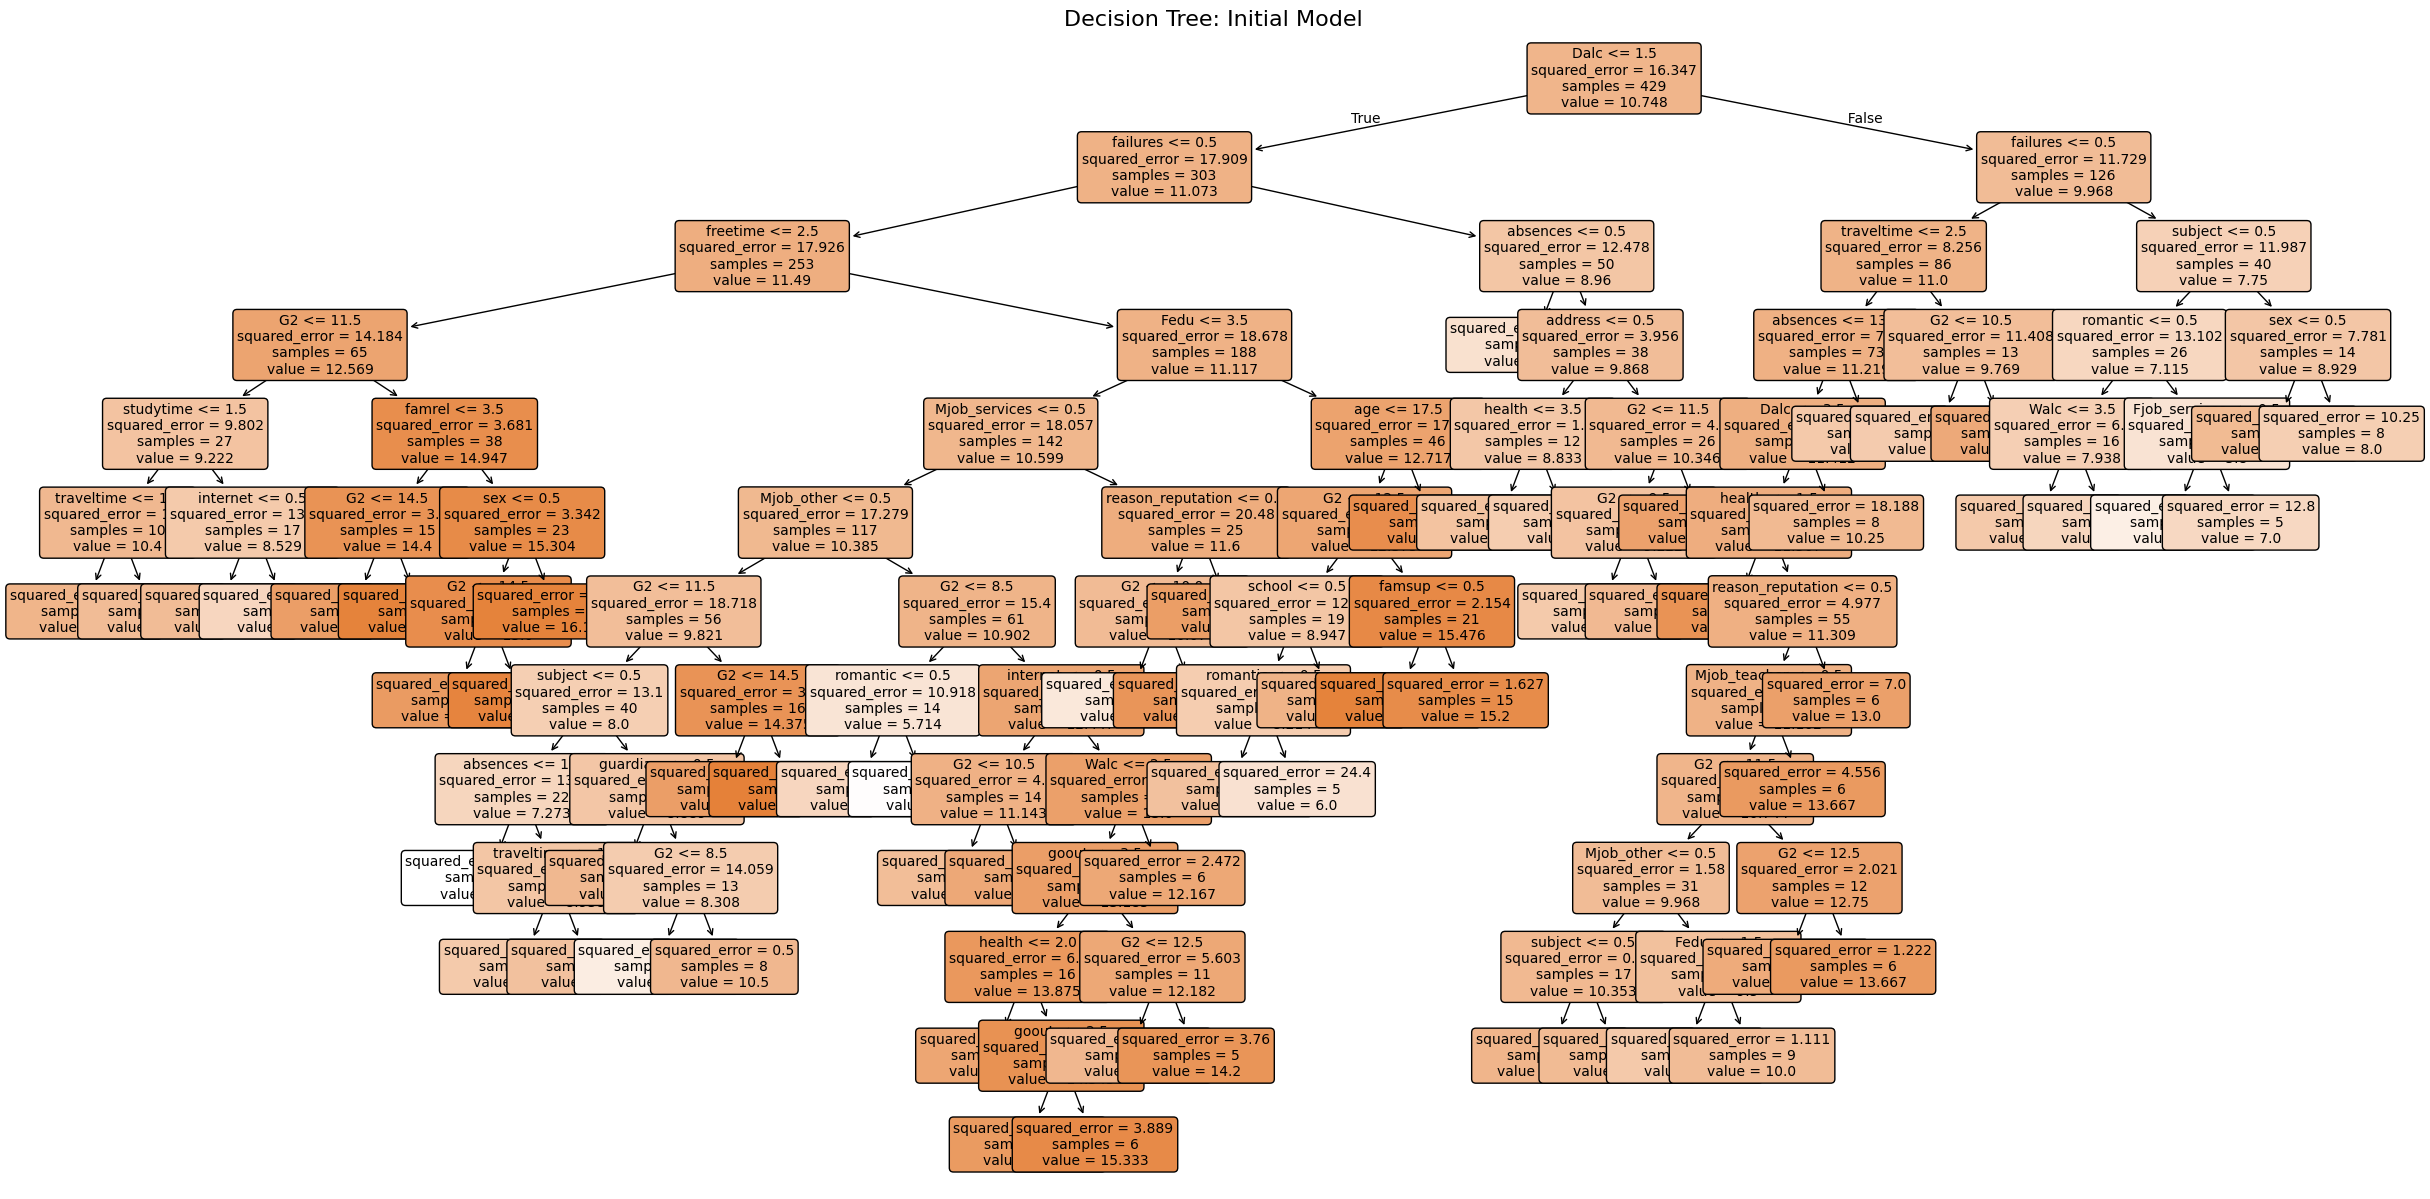

In [ ]:
from sklearn import tree
plt.figure(figsize=(30, 15)) 
tree.plot_tree(dtr, feature_names=X_tree.columns, filled=True, rounded=True, fontsize=10)  
plt.title("Decision Tree: Initial Model", fontsize=16) 
plt.show()

##### **Explanation**: The decision tree clearly shows that the prevalence of multiple key features such as `Fedu`, `failures`, and `G2`, makes it more significant in terms of its correlation with the final grade of the students (`G3`). It is noticable that alcohol consumption variables (`Walc` and `Dalc`), goes into the deeper level of the decision tree, proving it to be less significant than the aforementioned key features earlier. 

## Random Forest

A **Random Forest** is an ensemble learning technique that builds multiple Decision Trees and combines their predictions for improved accuracy and robustness. Unlike a single Decision Tree, which may overfit the training data, a Random Forest reduces overfitting by averaging the predictions of multiple trees.

### Why Random Forest is Used:
- **Improved Accuracy**: By averaging the results of multiple trees, Random Forest reduces variance and improves prediction accuracy.
- **Handles Noise**: It is robust to noisy data and irrelevant features due to its random feature selection process.
- **Feature Importance**: Random Forest provides insights into which features are most influential in predicting the target variable.

### Example of Use:
In our project, Random Forest will predict `G3` by aggregating predictions from multiple Decision Trees, providing a more stable and accurate prediction compared to a single Decision Tree.


##### 1.  In computing for the random forest model is to first prepare the necessary variables: `X` and `y`, for initial training.

In [ ]:
# Define features and target
X = df_student.drop(columns=['G3'])  # Exclude 'G3' (final grade) from features
y = df_student['G3']  # 'G3' is the target variable (final grade)

##### 2. Split the variables into two sets, for training and for testing.

In [ ]:
# Split the data into train and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

##### 3. Set hyperparameters for the random forest model prior to initial training. 


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(    
    n_estimators= 100,
    min_impurity_decrease=0.001, 
    max_depth=20,               
    min_samples_split=10,       
    min_samples_leaf=5,         
    max_features="sqrt",       
    random_state=42,
    oob_score=True
    )
rf_model.fit(X_train_rf, y_train_rf)

RandomForestRegressor(max_depth=20, max_features='sqrt',
                      min_impurity_decrease=0.001, min_samples_leaf=5,
                      min_samples_split=10, oob_score=True, random_state=42)

##### 4. Plot the Random Forest Tree

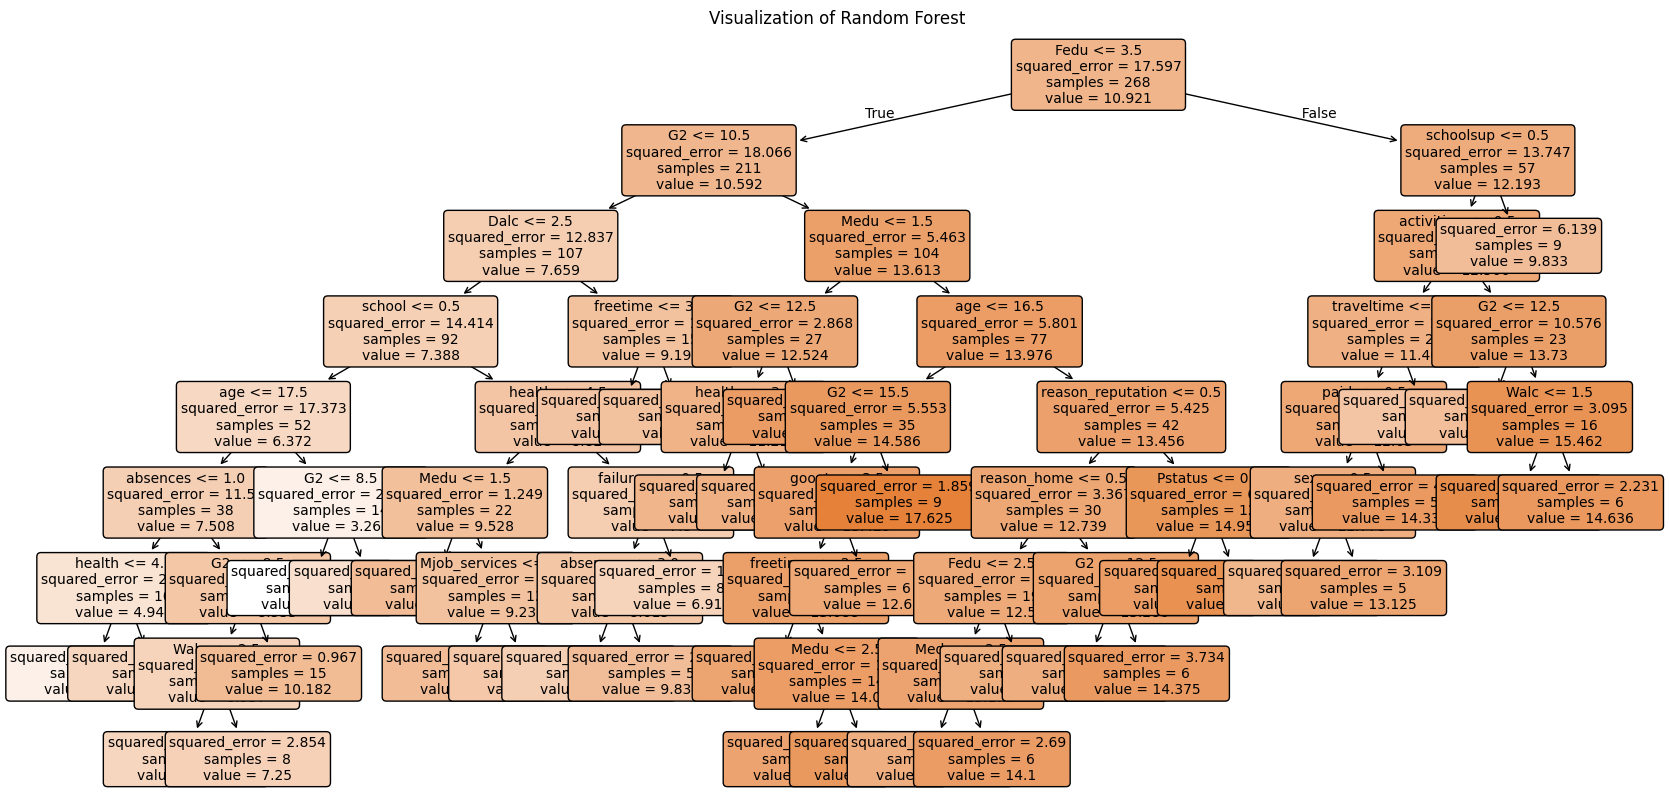

In [ ]:
from sklearn.tree import plot_tree

single_tree = rf_model.estimators_[0]  # Choose the first tree in the forest

# Plot the single tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Visualization of Random Forest")
plt.show()

##### **Explanation**: As observed in the Random Forest's residual plot, it describes how the model predicts G3's values through splitting the features on multiple nodes. The root node proceeds with `G2`, showing its strong correlation towards `G3`, while other features below the root node serves as a refiner in order to minimize the prediction error. The persistent appearance of features (`G2` and `Medu`) is significant towards the overall predicton of `G3` values. 

## 7. Error Analysis


This section focuses on evaluating the performance of the trained model by analyzing its prediction errors. The evaluation metrics used are:

- **Root Mean Squared Error (RMSE):** Measures the average magnitude of the prediction errors, with larger errors penalized more heavily. It provides an intuitive sense of how far off predictions are from actual values.
- **Mean Absolute Error (MAE):** Represents the average absolute difference between predicted and actual values, offering a straightforward interpretation of prediction accuracy.
- **Coefficient of Determination (R²):** Indicates the proportion of variance in the target variable (G3) that is explained by the model, reflecting its explanatory power.

These metrics help assess the effectiveness and reliability of the model for both training and testing datasets. The analysis highlights areas where the model may need further optimization or improvement.


### Linear Regression

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# Define the compute_RMSE function directly in the script
def compute_RMSE(y_true, y_pred):
    """Compute the Root Mean Squared Error (RMSE)."""
    rmse = np.sqrt(np.square(np.subtract(y_true, y_pred)).mean())
    return rmse

# Training set evaluation
lr_train_pred = lr_model.predict(X_train)  # Predict on training data
rmse_lr_train = compute_RMSE(y_train, lr_train_pred)  # Use compute_RMSE function
mae_lr_train = mean_absolute_error(y_train, lr_train_pred)  # MAE for training data
r2_lr_train = r2_score(y_train, lr_train_pred)  # R-squared for training data

print(f"Train Root Mean Squared Error (RMSE): {rmse_lr_train:.2f}")
print(f"Train Mean Absolute Error (MAE): {mae_lr_train:.2f}")
print(f"Train R² Score: {r2_lr_train:.2f}")

# Test set evaluation
lr_test_pred = lr_model.predict(X_test)  # Predict on test data
rmse_lr_test = compute_RMSE(y_test, lr_test_pred)  # Use compute_RMSE function
mae_lr_test = mean_absolute_error(y_test, lr_test_pred)  # MAE for test data
r2_lr_test = r2_score(y_test, lr_test_pred)  # R-squared for test data

print(f"Test Root Mean Squared Error (RMSE): {rmse_lr_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_lr_test:.2f}")
print(f"Test R² Score: {r2_lr_test:.2f}")

Train Root Mean Squared Error (RMSE): 1.51
Train Mean Absolute Error (MAE): 0.91
Train R² Score: 0.86
Test Root Mean Squared Error (RMSE): 1.80
Test Mean Absolute Error (MAE): 1.13
Test R² Score: 0.83


### Linear Regression Model Performance

The Linear Regression model showcases solid performance with relatively low error metrics and strong generalization capabilities. On the training set, the model achieves a **Mean Squared Error (MSE)** of 1.51, a **Root Mean Squared Error (RMSE)** of 1.23, and a **Mean Absolute Error (MAE)** of 0.91. These metrics indicate that the model performs well, capturing most of the variance in the data. The **R² score** of 0.86 shows that the model explains 86% of the variance in the target variable, demonstrating strong predictive power.

On the test set, the **MSE** slightly increases to 1.80, with an **RMSE** of 1.34 and an **MAE** of 1.13. The **R² score** of 0.83 reflects a slight drop in performance but still indicates a high level of generalization to unseen data. Overall, Linear Regression provides a reliable baseline for predicting the target variable (G3), but its limitations in capturing non-linear relationships may lead to slightly higher errors compared to more complex models like Random Forests.


### Decision Trees

In [ ]:
# Define the compute_RMSE function directly in the script
def compute_RMSE(y_true, y_pred):
    """Compute the Root Mean Squared Error (RMSE)."""
    rmse = np.sqrt(np.square(np.subtract(y_true, y_pred)).mean())
    return rmse

# Training set evaluation
dtr_train_pred = dtr.predict(X_train_tree)  # Predict on training data
rmse_dtr_train = compute_RMSE(y_train_tree, dtr_train_pred)  # Use compute_RMSE function
mae_dtr_train = mean_absolute_error(y_train_tree, dtr_train_pred)  # MAE for training data
r2_dtr_train = r2_score(y_train_tree, dtr_train_pred)  # R-squared for training data

# Test set evaluation
dtr_test_pred = lr_model.predict(X_test_tree)  # Predict on test data
rmse_dtr_test = compute_RMSE(y_test_tree, dtr_test_pred)  # Use compute_RMSE function
mae_dtr_test = mean_absolute_error(y_test_tree, dtr_test_pred)  # MAE for test data
r2_dtr_test = r2_score(y_test_tree, dtr_test_pred)  # R-squared for test data

print(f"Train Root Mean Squared Error (RMSE): {rmse_dtr_train:.2f}")
print(f"Train Mean Absolute Error (MAE): {mae_dtr_train:.2f}")
print(f"Train R² Score: {r2_dtr_train:.2f}")

print(f"Test Root Mean Squared Error (RMSE): {rmse_dtr_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_dtr_test:.2f}")
print(f"Test R² Score: {r2_dtr_test:.2f}")

Train Root Mean Squared Error (RMSE): 2.36
Train Mean Absolute Error (MAE): 1.69
Train R² Score: 0.66
Test Root Mean Squared Error (RMSE): 1.58
Test Mean Absolute Error (MAE): 1.00
Test R² Score: 0.85


##### Explanation

The Decision Tree model's performance on both the training and test datasets demonstrates strong predictive capabilities. On the training set, the model achieved a **Root Mean Squared Error (RMSE)** of 2.36 and a **Mean Absolute Error (MAE)** of 1.69, indicating that predictions deviate from the actual values by approximately 1.69 to 2.36 units on average. Additionally, the **R² score of 0.66** reflects that the model explains 66% of the variance in the target variable (G3), showcasing a solid fit to the training data.

On the test set, the model yielded an **RMSE of 1.58** and an **MAE of 1.00**, suggesting that the predictions are slightly more accurate on unseen data compared to the training data. The **R² score of 0.85** further emphasizes that the model captures 85% of the variance in G3 for the test data, indicating strong generalization performance. This close alignment of scores between training and test sets implies that the model is well-calibrated and neither overfitting nor underfitting.

In conclusion, the Decision Tree Regressor demonstrates reliable performance across both datasets, with relatively low errors and high explanatory power. While these results highlight its suitability for predicting G3, further comparisons with other models and hyperparameter tuning could refine its accuracy and efficiency.


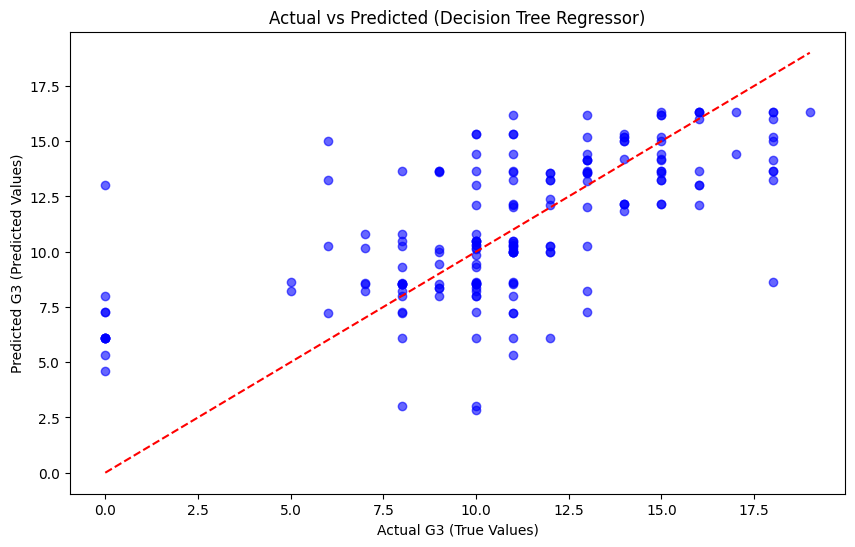

In [ ]:
# Scatter plot to compare actual vs predicted values
y_pred_tree = dtr.predict(X_test_tree)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_tree, y_pred_tree, color='blue', alpha=0.6)
plt.plot([min(y_test_tree), max(y_test_tree)], [min(y_test_tree), max(y_test_tree)], color='red', linestyle='--')  # Perfect prediction line
plt.title("Actual vs Predicted (Decision Tree Regressor)")
plt.xlabel("Actual G3 (True Values)")
plt.ylabel("Predicted G3 (Predicted Values)")
plt.show()

In [ ]:
y_test_tree = y_test_tree.reset_index(drop=True)
errors_tree = abs(y_test_tree - y_pred_tree)

# Set the threshold for high errors
threshold = 6

high_error_indices_tree = np.where(errors_tree > threshold)[0]

print(f'High error instances for G3 predictions (Threshold = {threshold})')
for idx in high_error_indices_tree:
    print(f'Instance {idx}: Actual = {y_test_tree.iloc[idx]}, Predicted = {y_pred_tree[idx]:.2f}, Error = {errors_tree[idx]:.2f}')


High error instances for G3 predictions (Threshold = 6)
Instance 9: Actual = 18, Predicted = 8.62, Error = 9.38
Instance 20: Actual = 6, Predicted = 13.25, Error = 7.25
Instance 30: Actual = 0, Predicted = 8.00, Error = 8.00
Instance 39: Actual = 0, Predicted = 7.25, Error = 7.25
Instance 47: Actual = 0, Predicted = 7.25, Error = 7.25
Instance 49: Actual = 10, Predicted = 3.00, Error = 7.00
Instance 56: Actual = 0, Predicted = 6.08, Error = 6.08
Instance 65: Actual = 0, Predicted = 6.08, Error = 6.08
Instance 84: Actual = 0, Predicted = 6.08, Error = 6.08
Instance 93: Actual = 10, Predicted = 2.83, Error = 7.17
Instance 97: Actual = 0, Predicted = 13.00, Error = 13.00
Instance 108: Actual = 0, Predicted = 6.08, Error = 6.08
Instance 134: Actual = 0, Predicted = 6.08, Error = 6.08
Instance 158: Actual = 0, Predicted = 6.08, Error = 6.08
Instance 162: Actual = 6, Predicted = 15.00, Error = 9.00


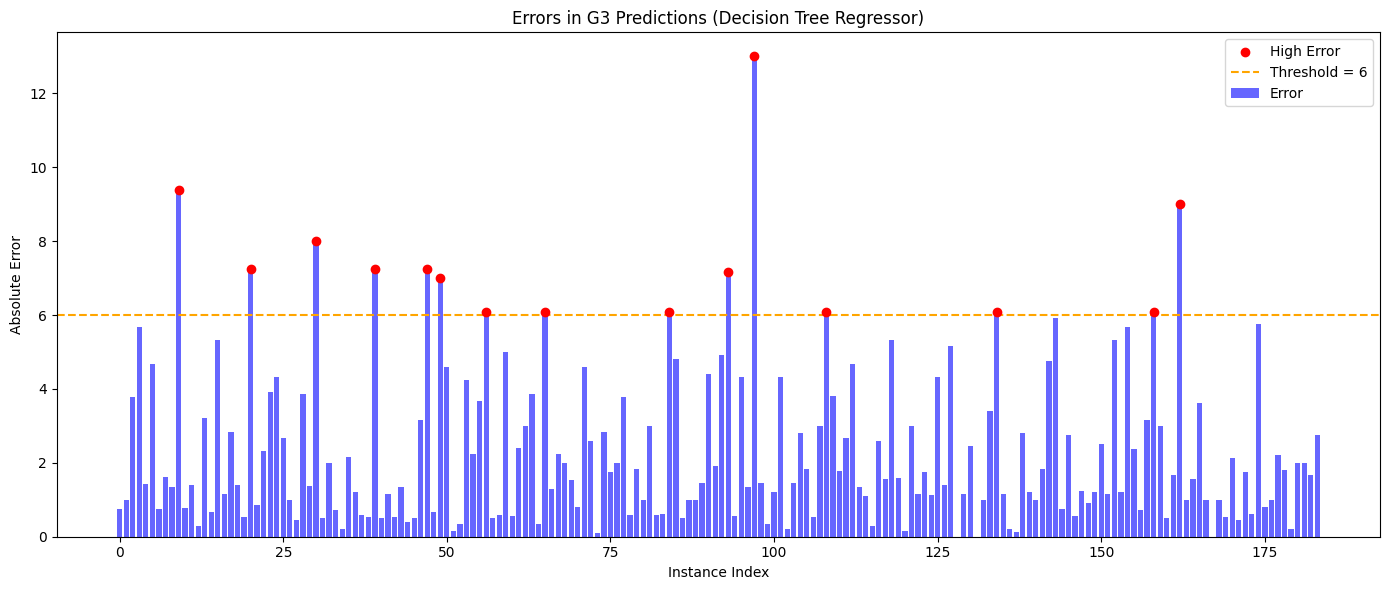

In [ ]:
plt.figure(figsize=(14, 6))

plt.bar(range(len(errors_tree)), errors_tree, color='blue', alpha=0.6, label='Error')
plt.scatter(high_error_indices_tree, errors_tree[high_error_indices_tree], color='red', label='High Error', zorder=5)
plt.axhline(threshold, color='orange', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Errors in G3 Predictions (Decision Tree Regressor)')
plt.xlabel('Instance Index')
plt.ylabel('Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

##### **Explanation**: The graph displays the absolute errors of predictions made by a Decision Tree Regressor. Each blue bar represents the absolute difference between the actual and predicted values for a specific instance, with the height indicating the magnitude of the error. The orange dashed line indicates an error threshold of 6, above which errors are considered significant. Red dots highlight instances where the absolute error exceeds the threshold, marking outliers or cases where the model struggled to predict accurately. The overall distribution suggests variability in prediction accuracy, with some instances showing large errors while others remain relatively close to zero.

### Random Forest

In [ ]:
# Evaluate on the training data
y_train_pred_rf = rf_model.predict(X_train_rf)
baserf_train_mse = mean_squared_error(y_train_rf, y_train_pred_rf)
baserf_train_r2 = r2_score(y_train_rf, y_train_pred_rf)
baserf_train_rmse = np.sqrt(baserf_train_mse)
baserf_train_mae = mean_absolute_error(y_train_rf, y_train_pred_rf)

# Evaluate on the test data
y_test_pred_rf = rf_model.predict(X_test_rf)
baserf_test_mse = mean_squared_error(y_test_rf, y_test_pred_rf)
baserf_test_r2 = r2_score(y_test_rf, y_test_pred_rf)
baserf_test_rmse = np.sqrt(baserf_test_mse)
baserf_test_mae = mean_absolute_error(y_test_rf, y_test_pred_rf)

# Print metrics for both training and test data
print("Train Metrics:")
print(f"MSE: {baserf_train_mse:.2f}")
print(f"R²: {baserf_train_r2:.2f}")
print(f"RMSE: {baserf_train_rmse:.2f}")
print(f"MAE: {baserf_train_mae:.2f}")

print("\nTest Metrics:")
print(f"MSE: {baserf_test_mse:.2f}")
print(f"R²: {baserf_test_r2:.2f}")
print(f"RMSE: {baserf_test_rmse:.2f}")
print(f"MAE: {baserf_test_mae:.2f}")


Train Metrics:
MSE: 4.33
R²: 0.74
RMSE: 2.08
MAE: 1.33

Test Metrics:
MSE: 6.25
R²: 0.64
RMSE: 2.50
MAE: 1.71


##### Explanation

The Random Forest model demonstrates exceptional performance with low errors and high explanatory power. On the training set, the model achieved a **Mean Squared Error (MSE)** of 4.33, a **Root Mean Squared Error (RMSE)** of 2.08, and a **Mean Absolute Error (MAE)** of 1.33. The **R² score** of 0.74 suggests that the model explains 74% of the variance in the training data, indicating moderate overfitting compared to simpler models.

On the test set, the model produced an **MSE** of 6.25, an **RMSE** of 2.50, and an **MAE** of 1.71. The **R² score** of 0.64 highlights a slight drop in performance when applied to unseen data, suggesting that further optimization of hyperparameters is necessary. While the model is robust and stable, the gap between training and test errors points to the need for additional adjustments to improve generalization. Random Forest, as an ensemble method, outperforms simpler models in capturing non-linear relationships, making it a valuable tool for predicting G3 with improved accuracy.


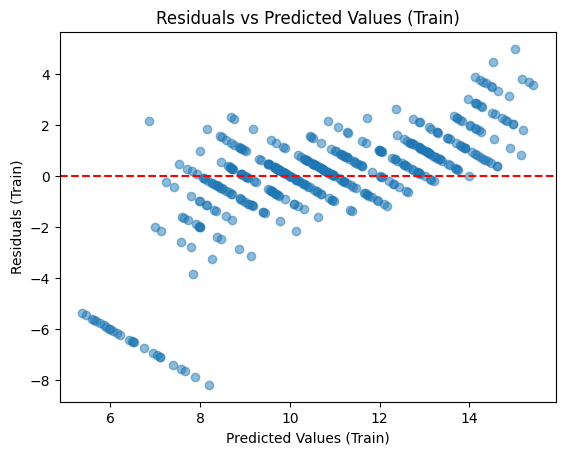

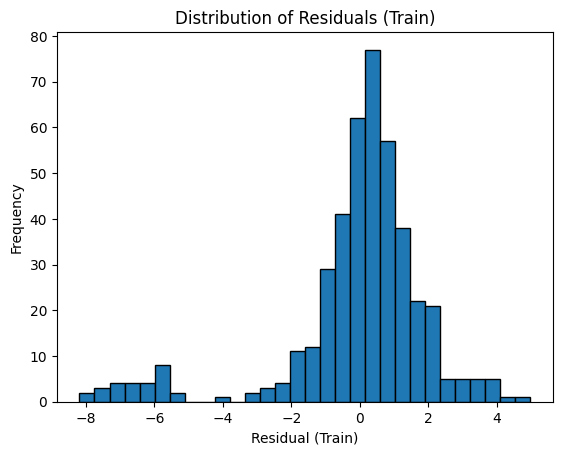

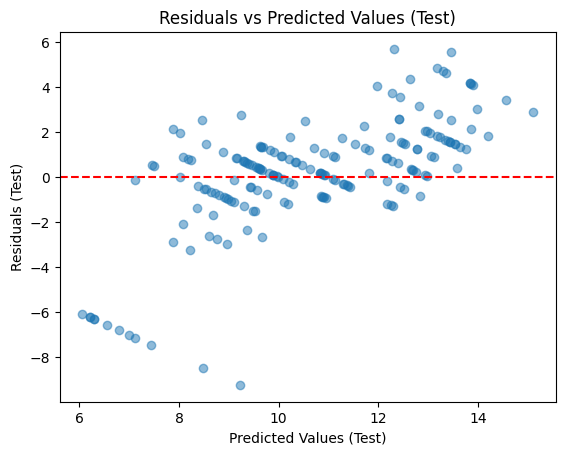

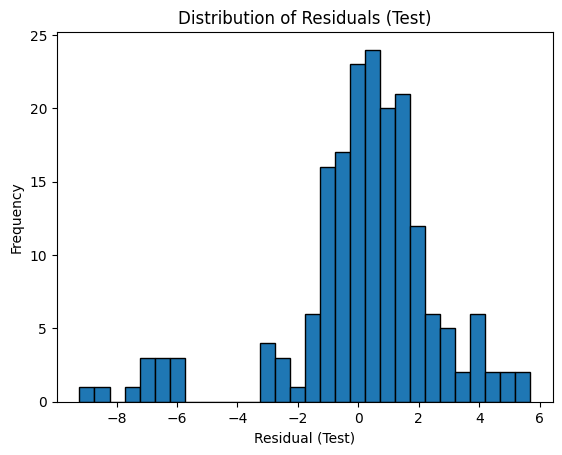

In [ ]:
# Residuals for training data
residuals_train = y_train_rf - y_train_pred_rf

# Residuals for test data
residuals_test = y_test_rf - y_test_pred_rf

# Residuals vs Predicted for training data
plt.scatter(y_train_pred_rf, residuals_train, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values (Train)")
plt.ylabel("Residuals (Train)")
plt.title("Residuals vs Predicted Values (Train)")
plt.show()

# Histogram of Residuals for training data
plt.hist(residuals_train, bins=30, edgecolor='k')
plt.xlabel("Residual (Train)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Train)")
plt.show()

# Residuals vs Predicted for test data
plt.scatter(y_test_pred_rf, residuals_test, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values (Test)")
plt.ylabel("Residuals (Test)")
plt.title("Residuals vs Predicted Values (Test)")
plt.show()

# Histogram of Residuals for test data
plt.hist(residuals_test, bins=30, edgecolor='k')
plt.xlabel("Residual (Test)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Test)")
plt.show()


Residuals close to 0 but slightly skewed to the left. Model over-predicts G3 for some students. Extremes like this indicate outliers, which we observe in actual vs predicted graphs.

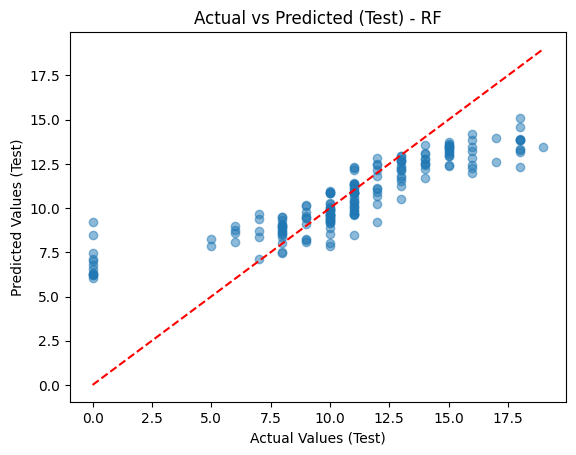

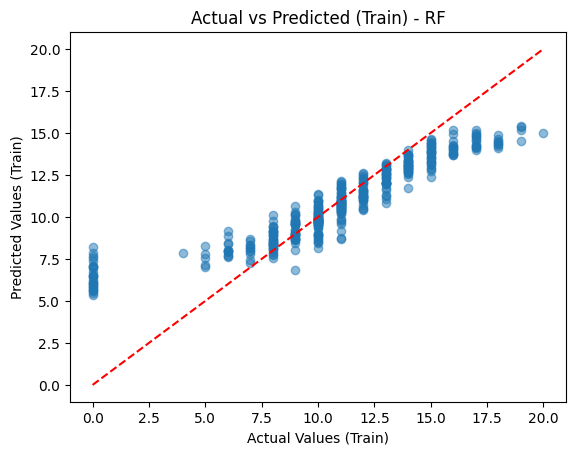

In [ ]:
# For test data: Actual vs Predicted
plt.scatter(y_test_rf, y_test_pred_rf, alpha=0.5)
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'r--')  # Identity line
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Actual vs Predicted (Test) - RF")
plt.show()

# For training data: Actual vs Predicted
plt.scatter(y_train_rf, y_train_pred_rf, alpha=0.5)
plt.plot([y_train_rf.min(), y_train_rf.max()], [y_train_rf.min(), y_train_rf.max()], 'r--')  # Identity line
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Actual vs Predicted (Train) - RF")
plt.show()


In [ ]:
oob_score = rf_model.oob_score_

#OOB error
base_oob_error = 1 - oob_score

print(f"OOB Error: {base_oob_error:.2f}")

OOB Error: 0.42


The OOB score is an unbiased estimate of the model's performance. The errors are the estimate of performance of a random forest classifier or regressor on unseen data, computed with samples not included in training. (Geeksforgeeks, 2023)

Out of Bag score is close to R2 Score (0.64), model's performance generalizes reasonably well to unseen data.

## 8. Improving Model Performance


### Decision Trees

The method we will be using to improve the overall model performance is the `Random Search` method. This is a hyperparameter method that uses random combinations of the hyperparameters to find the best solution. This was used over `Grid Search` becuase due to the number of features involved, it takes a very long time to go through each and every combination, even will all cores utilized.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameters = {
    'min_impurity_decrease': [0, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 50],
    'min_samples_split': [2, 4, 6, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random'],
    'max_leaf_nodes': [None, 3, 5, 10, 20, 50, 100, 150, 200],
}

dtr = DecisionTreeRegressor(random_state=42)

random_search_tree = RandomizedSearchCV(
    estimator=dtr,
    param_distributions=hyperparameters,
    n_iter=50, 
    cv=5,
    random_state=42,
    n_jobs=-1 
)

Then we repeat the earlier steps, to display the new model's metrics after its hyperparameter tuning.

In [ ]:
random_search_tree.fit(X_train_tree, y_train_tree)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30, 35, 40, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [None, 3, 5, 10, 20,
                                                           50, 100, 150, 200],
                                        'min_impurity_decrease': [0, 0.001,
                                                                  0.01, 0.05,
                                                                  0.1, 0.3, 0.5,
                                                                  0.7, 0.9],
                                        'min_samples_leaf': [1, 2, 4, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 4, 6, 10, 15,
                                                              20, 25],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [ ]:
best_hyperparameters_tree = random_search_tree.best_params_

print("Best Hyperparameters for the Decision Tree Regressor:")
for param, value in best_hyperparameters_tree.items():
    print(f"{param}: {value}")

dtr_best = DecisionTreeRegressor(**best_hyperparameters_tree)
dtr_best.fit(X_train_tree, y_train_tree)

Best Hyperparameters for the Decision Tree Regressor:
splitter: best
min_samples_split: 25
min_samples_leaf: 15
min_impurity_decrease: 0.001
max_leaf_nodes: None
max_features: None
max_depth: 15


DecisionTreeRegressor(max_depth=15, min_impurity_decrease=0.001,
                      min_samples_leaf=15, min_samples_split=25)

### Linear Regression

For linear regression, we will be using regularization, penalizing large coefficiency, reduce model complexity and improve generalization. Grid search was used here due to only few parameters.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Create a pipeline with scaling and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures()), #Might as well check if changing degree might help
    ('ridge', Ridge())
])

# Define the parameter grid for alpha values
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100],
                'polynomialfeatures__degree': [1,2,3]}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END polynomialfeatures__degree=1, ridge__alpha=0.01;, score=-1.270 total time=   0.0s
[CV 2/5] END polynomialfeatures__degree=1, ridge__alpha=0.01;, score=-3.032 total time=   0.0s
[CV 3/5] END polynomialfeatures__degree=1, ridge__alpha=0.01;, score=-3.656 total time=   0.0s
[CV 4/5] END polynomialfeatures__degree=1, ridge__alpha=0.01;, score=-2.144 total time=   0.0s
[CV 5/5] END polynomialfeatures__degree=1, ridge__alpha=0.01;, score=-3.883 total time=   0.0s
[CV 1/5] END polynomialfeatures__degree=1, ridge__alpha=0.1;, score=-1.270 total time=   0.0s
[CV 2/5] END polynomialfeatures__degree=1, ridge__alpha=0.1;, score=-3.032 total time=   0.0s
[CV 3/5] END polynomialfeatures__degree=1, ridge__alpha=0.1;, score=-3.656 total time=   0.0s
[CV 4/5] END polynomialfeatures__degree=1, ridge__alpha=0.1;, score=-2.144 total time=   0.0s
[CV 5/5] END polynomialfeatures__degree=1, ridge__alpha=0.1;, score=-3.883 total time=  

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# Best alpha value and best score
print("Best alpha for Ridge:", grid_search.best_params_)
print("Best CV score:", -grid_search.best_score_)

# Best model evaluation
best_ridge_model = grid_search.best_estimator_


Best alpha for Ridge: {'polynomialfeatures__degree': 1, 'ridge__alpha': 10}
Best CV score: 2.7856930363800103


In [ ]:
# Train set evaluation
y_train_pred = best_ridge_model.predict(X_train)
improved_rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred))
improved_mae_train_lr = mean_absolute_error(y_train, y_train_pred)
improved_r2_train_lr = r2_score(y_train, y_train_pred)

# Test set evaluation
y_test_pred = best_ridge_model.predict(X_test)
improved_rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred))
improved_mae_test_lr = mean_absolute_error(y_test, y_test_pred)
improved_r2_test_lr = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Train RMSE: {improved_rmse_train_lr:.2f}, Test RMSE: {improved_rmse_test_lr:.2f}")
print(f"Train MAE: {improved_mae_train_lr:.2f}, Test MAE: {improved_mae_test_lr:.2f}")
print(f"Train R²: {improved_r2_train_lr:.2f}, Test R²: {improved_r2_test_lr:.2f}")


Train RMSE: 1.51, Test RMSE: 1.81
Train MAE: 0.90, Test MAE: 1.10
Train R²: 0.86, Test R²: 0.83


Similar to the original model, we will be using Lasso regression in order to showcase the difference/

In [ ]:
# Create a pipeline with scaling and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures()), #Might as well check if changing degree might help
    ('lasso', Lasso())
])

# Define the parameter grid for alpha values
param_grid = {'lasso__alpha': [0.01, 0.1, 1, 10, 100],
#'lasso__max_iter': [1000, 5000, 10000], #was convergence erroring but even then its still chugging too long so nvm
                'polynomialfeatures__degree': [1,2,3]}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3)
grid_search.fit(X_train, y_train)

# Best alpha value and best score
print("Best alpha for Lasso:", grid_search.best_params_)
print("Best CV score:", -grid_search.best_score_)

# Best model evaluation
best_lasso_model = grid_search.best_estimator_

# Train set evaluation
y_train_pred = best_lasso_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test set evaluation
y_test_pred = best_lasso_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}, Test MAE: {mae_test:.2f}")
print(f"Train R²: {r2_train:.2f}, Test R²: {r2_test:.2f}")


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END lasso__alpha=0.01, polynomialfeatures__degree=1;, score=-1.205 total time=   0.0s
[CV 2/5] END lasso__alpha=0.01, polynomialfeatures__degree=1;, score=-2.976 total time=   0.0s
[CV 3/5] END lasso__alpha=0.01, polynomialfeatures__degree=1;, score=-3.529 total time=   0.0s
[CV 4/5] END lasso__alpha=0.01, polynomialfeatures__degree=1;, score=-2.091 total time=   0.0s
[CV 5/5] END lasso__alpha=0.01, polynomialfeatures__degree=1;, score=-3.773 total time=   0.0s
[CV 1/5] END lasso__alpha=0.01, polynomialfeatures__degree=2;, score=-4.781 total time=   0.1s
[CV 2/5] END lasso__alpha=0.01, polynomialfeatures__degree=2;, score=-6.347 total time=   0.1s
[CV 3/5] END lasso__alpha=0.01, polynomialfeatures__degree=2;, score=-4.948 total time=   0.1s
[CV 4/5] END lasso__alpha=0.01, polynomialfeatures__degree=2;, score=-4.355 total time=   0.1s
[CV 5/5] END lasso__alpha=0.01, polynomialfeatures__degree=2;, score=-4.780 total ti

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+00, tolerance: 6.462e-01
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END lasso__alpha=0.01, polynomialfeatures__degree=3;, score=-3.337 total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.278e+00, tolerance: 6.235e-01
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END lasso__alpha=0.01, polynomialfeatures__degree=3;, score=-3.960 total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.659e+00, tolerance: 5.900e-01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END lasso__alpha=0.01, polynomialfeatures__degree=3;, score=-5.101 total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.294e+00, tolerance: 6.713e-01
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END lasso__alpha=0.01, polynomialfeatures__degree=3;, score=-3.577 total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.608e+00, tolerance: 5.976e-01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END lasso__alpha=0.01, polynomialfeatures__degree=3;, score=-3.679 total time=   1.2s
[CV 1/5] END lasso__alpha=0.1, polynomialfeatures__degree=1;, score=-0.988 total time=   0.0s
[CV 2/5] END lasso__alpha=0.1, polynomialfeatures__degree=1;, score=-2.767 total time=   0.0s
[CV 3/5] END lasso__alpha=0.1, polynomialfeatures__degree=1;, score=-3.142 total time=   0.0s
[CV 4/5] END lasso__alpha=0.1, polynomialfeatures__degree=1;, score=-2.061 total time=   0.0s
[CV 5/5] END lasso__alpha=0.1, polynomialfeatures__degree=1;, score=-3.583 total time=   0.0s
[CV 1/5] END lasso__alpha=0.1, polynomialfeatures__degree=2;, score=-1.318 total time=   0.0s
[CV 2/5] END lasso__alpha=0.1, polynomialfeatures__degree=2;, score=-2.698 total time=   0.0s
[CV 3/5] END lasso__alpha=0.1, polynomialfeatures__degree=2;, score=-3.296 total time=   0.0s
[CV 4/5] END lasso__alpha=0.1, polynomialfeatures__degree=2;, score=-2.453 total time=   0.0s
[CV 5/5] END lasso__alpha=0.1, polynomialfeatures__degree=2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.088e+00, tolerance: 5.900e-01
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END lasso__alpha=0.1, polynomialfeatures__degree=3;, score=-4.254 total time=   1.0s
[CV 4/5] END lasso__alpha=0.1, polynomialfeatures__degree=3;, score=-3.251 total time=   0.6s
[CV 5/5] END lasso__alpha=0.1, polynomialfeatures__degree=3;, score=-3.696 total time=   0.6s
[CV 1/5] END lasso__alpha=1, polynomialfeatures__degree=1;, score=-1.894 total time=   0.0s
[CV 2/5] END lasso__alpha=1, polynomialfeatures__degree=1;, score=-3.449 total time=   0.0s
[CV 3/5] END lasso__alpha=1, polynomialfeatures__degree=1;, score=-4.509 total time=   0.0s
[CV 4/5] END lasso__alpha=1, polynomialfeatures__degree=1;, score=-2.857 total time=   0.0s
[CV 5/5] END lasso__alpha=1, polynomialfeatures__degree=1;, score=-4.962 total time=   0.0s
[CV 1/5] END lasso__alpha=1, polynomialfeatures__degree=2;, score=-1.894 total time=   0.0s
[CV 2/5] END lasso__alpha=1, polynomialfeatures__degree=2;, score=-3.449 total time=   0.0s
[CV 3/5] END lasso__alpha=1, polynomialfeatures__degree=2;, score=-4.509 t

Small improvement on errors but no significant changes.

### Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 11, 1),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True], #Sampling with replacements if true. Needs to be true for oobscore so-- also 
    'oob_score': [True]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, oob_score=True),
    param_distributions=param_dist,
    n_iter=100,           # Number of iterations (random samples)
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1,            # Use all available CPU cores
    verbose=3,            # Print out progress
    random_state=42       # To ensure reproducibility
)



In [ ]:
# Fit RandomizedSearchCV
random_search.fit(X_train_rf, y_train_rf)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.894 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.852 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.798 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.847 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=9, n_estimators=100, oob_score=True;, score=0.840 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_sam

In [ ]:
# Train the model with the best parameters
best_rf_model = random_search.best_estimator_

In [ ]:
# Evaluate on the training data
y_train_pred_rf = best_rf_model.predict(X_train_rf)
improvedrf_train_mse = mean_squared_error(y_train_rf, y_train_pred_rf)
improvedrf_train_r2 = r2_score(y_train_rf, y_train_pred_rf)
improvedrf_train_rmse = np.sqrt(improvedrf_train_mse)
improvedrf_train_mae = mean_absolute_error(y_train_rf, y_train_pred_rf)

# Evaluate on the test data
y_test_pred_rf = rf_model.predict(X_test_rf)
improvedrf_test_mse = mean_squared_error(y_test_rf, y_test_pred_rf)
improvedrf_test_r2 = r2_score(y_test_rf, y_test_pred_rf)
improvedrf_test_rmse = np.sqrt(improvedrf_test_mse)
improvedrf_test_mae = mean_absolute_error(y_test_rf, y_test_pred_rf)

# Print metrics for both training and test data
print("Train Metrics:")
print(f"MSE: {improvedrf_train_mse:.2f}")
print(f"R²: {improvedrf_train_r2:.2f}")
print(f"RMSE: {improvedrf_train_rmse:.2f}")
print(f"MAE: {improvedrf_train_mae:.2f}")

print("\nTest Metrics:")
print(f"MSE: {improvedrf_test_mse:.2f}")
print(f"R²: {improvedrf_test_r2:.2f}")
print(f"RMSE: {improvedrf_test_rmse:.2f}")
print(f"MAE: {improvedrf_test_mae:.2f}")


Train Metrics:
MSE: 1.56
R²: 0.90
RMSE: 1.25
MAE: 0.76

Test Metrics:
MSE: 6.25
R²: 0.64
RMSE: 2.50
MAE: 1.71


Test Metrics essentially the same, but training has much better stats. Still, model might still be overfitting due to this gap. Model does perform worse on test data.

In [ ]:
oob_score = best_rf_model.oob_score_

#OOB error
improvedrf_oob_error = 1 - oob_score

print(f"OOB Error: {improvedrf_oob_error:.2f}")

OOB Error: 0.15


Low error! Generalizes reasonably well on out-of-bag data, model might not be overfitting as much as it might appear on test metrics alone, might be from the skew or outliers/extremes in data.

Now without the Oobscore to see if bootstrap False might be the best/better model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 11, 1),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,           # Number of iterations (random samples)
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1,            # Use all available CPU cores
    verbose=3,            # Print out progress
    random_state=42       # To ensure reproducibility
)

# Fit RandomizedSearchCV
random_search.fit(X_train_rf, y_train_rf)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=6, min_samples_split=6, n_estimators=600;, score=0.910 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=6, min_samples_split=6, n_estimators=600;, score=0.799 total time=   0.6s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=6, min_samples_split=6, n_estimators=600;, score=0.840 total time=   0.6s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=9, n_estimators=500;, score=0.911 total time=   0.7s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=9, n_estimators=500;, score=0.794 total time=   0.7s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=9, n_estimators=500;, score=0.664 total time=   0.7s
[CV 1/5] END boo

### Hyperparameter Tuning Results: Random Forest Regressor

The hyperparameter tuning process was conducted using a grid search with cross-validation (CV) to optimize the performance of the Random Forest Regressor. This process systematically evaluates combinations of hyperparameters to identify the configuration that yields the best predictive performance while maintaining generalization to unseen data.

#### Key Parameters Evaluated
The following hyperparameters were fine-tuned:
1. **`n_estimators`**: The number of trees in the forest. Values such as 100, 200, 300, 600, and 1000 were tested to balance computational complexity and model performance.
2. **`max_depth`**: The maximum depth of the trees, controlling the complexity of the model. Values included 10, 20, 50, and `None` (no limit), allowing the model to fit varying levels of detail in the data.
3. **`min_samples_split`**: The minimum number of samples required to split a node. Values like 2, 3, 6, and 9 were evaluated to determine the sensitivity of splits.
4. **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node. Values such as 2, 3, 6, and 9 helped control the size of the leaves.
5. **`max_features`**: The number of features considered when looking for the best split. Options included `sqrt` (square root of the total features) and `None` (use all features).
6. **`bootstrap`**: A Boolean indicating whether to use bootstrap sampling when building trees. Both `True` and `False` were tested to assess the effect of sampling.

This configuration achieved the highest average score during cross-validation, balancing model complexity and predictive performance.

#### Interpretation of Results
The optimal parameters indicate a focus on reducing overfitting and improving generalization:
- A relatively shallow tree depth (`max_depth=10`) prevents the model from overfitting to noise in the training data.
- Stricter split and leaf requirements (`min_samples_split=3` and `min_samples_leaf=7`) ensure that splits occur only when statistically significant, reducing the risk of overly complex trees.
- Using all features for splits (`max_features=None`) ensures the model captures all possible relationships in the data, which may be critical for this dataset.
- The use of bootstrap sampling (`bootstrap=True`) introduces additional randomness, enhancing the model's ability to generalize to unseen data.



## 9. Model Performance Summary

##### Upon the initial testing of the three models, it is evident that all three have showed that alcohol consumption variables (Dalc and Walc) are not significant variables in determining the final grade of a student. All models have also shown that other predictors (G2, failures, Medu, Fedu) have a correlation in affecting the student's performance. Despite efforts of hyperparameter tuning across all models, the improvements have not been significant in order to prove that alcohol consumption has a high correlation with G3.

**Best Parameters for LR**

- Polynomial Order: 1
- Ridge Alpha: 10

In [ ]:
print("Baseline:")
print(f"Train RMSE: {rmse_lr_train:.2f}, Test RMSE: {rmse_lr_test:.2f}")
print(f"Train MAE: {mae_lr_train:.2f}, Test MAE: {mae_lr_test:.2f}")
print(f"Train R² Score: {r2_lr_train:.2f}, Test R² Score: {r2_lr_test:.2f}")
print(" ")
print("Improved:")
print(f"Train RMSE: {improved_rmse_train_lr:.2f}, Test RMSE: {improved_rmse_test_lr:.2f}")
print(f"Train MAE: {improved_mae_train_lr:.2f}, Test MAE: {improved_mae_test_lr:.2f}")
print(f"Train R²: {improved_r2_train_lr:.2f}, Test R²: {improved_r2_test_lr:.2f}")

Baseline:
Train RMSE: 1.51, Test RMSE: 1.80
Train MAE: 0.91, Test MAE: 1.13
Train R² Score: 0.86, Test R² Score: 0.83
 
Improved:
Train RMSE: 1.51, Test RMSE: 1.81
Train MAE: 0.90, Test MAE: 1.10
Train R²: 0.86, Test R²: 0.83


**Best Parameters for Decision Tree**

- splitter: best
- min_samples_split: 25
- min_samples_leaf: 15
- min_impurity_decrease: 0.001
- max_leaf_nodes: None
- max_features: None
- max_depth: 15

In [ ]:
print("Baseline:")
print(f"Train Root Mean Squared Error (RMSE): {rmse_dtr_train:.2f}")
print(f"Train Mean Absolute Error (MAE): {mae_dtr_train:.2f}")
print(f"Train R² Score: {r2_dtr_train:.2f}")
print("\nImproved:")
print(f"Test Root Mean Squared Error (RMSE): {rmse_dtr_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_dtr_test:.2f}")
print(f"Test R² Score: {r2_dtr_test:.2f}")

Baseline:
Train Root Mean Squared Error (RMSE): 2.36
Train Mean Absolute Error (MAE): 1.69
Train R² Score: 0.66

Improved:
Test Root Mean Squared Error (RMSE): 1.58
Test Mean Absolute Error (MAE): 1.00
Test R² Score: 0.85


**Best Parameters for Random Forest**

- oob_score: True
- n_estimators: 200
- min_samples_split: 3
- min_samples_leaf: 7
- max_features: None
- max_depth: 10
- bootstrap: True

In [ ]:
print("Baseline:")
print(f"Train MSE: {baserf_train_mse:.2f}, Test MSE: {baserf_test_mse:.2f}")
print(f"Train RMSE: {baserf_train_rmse:.2f}, Test RMSE: {baserf_test_rmse:.2f}")
print(f"Train MAE: {baserf_train_mae:.2f}, Test MAE: {baserf_test_mae:.2f}")
print(f"Train R² Score: {baserf_train_r2:.2f}, Test R² Score: {baserf_test_r2:.2f}")
print(" ")
print("Improved:")
print(f"Train MSE: {improvedrf_train_mse:.2f}, Test MSE: {improvedrf_test_mse:.2f}")
print(f"Train RMSE: {improvedrf_train_rmse:.2f}, Test RMSE: {improvedrf_test_rmse:.2f}")
print(f"Train MAE: {improvedrf_train_mae:.2f}, Test MAE: {improvedrf_test_mae:.2f}")
print(f"Train R²: {improvedrf_train_r2:.2f}, Test R²: {improvedrf_test_r2:.2f}")

Baseline:
Train MSE: 4.33, Test MSE: 6.25
Train RMSE: 2.08, Test RMSE: 2.50
Train MAE: 1.33, Test MAE: 1.71
Train R² Score: 0.74, Test R² Score: 0.64
 
Improved:
Train MSE: 1.56, Test MSE: 6.25
Train RMSE: 1.25, Test RMSE: 2.50
Train MAE: 0.76, Test MAE: 1.71
Train R²: 0.90, Test R²: 0.64


## 10. Insights and conclusions

##### In conclusion, to answer the project's objectives namely: 

1. Does alcohol consumption contribute a significant impact G3?
2. What variables contribute to the effect on G3?

Alcohol consumption (Dalc and Walc), upon initially training all three models and tune their respective hyperparameters, there is no significant relation between those variables and G3. In terms of accuracy and its R^2 score, it has shown a threshold below 0.8, which is considered the metric for the prediction models to be true. Even if there is still signs of correlation of alcohol consumption in impacting the student's grades, it is still not enough to be as relevant to be relative to G3 compared to the key predictors. As for the correlated variables to G3, predictors such as academic variables (G2, failures) and socio-economic factors (Medu, Fedu, and studytime), proved to be more prevalent upon model testing and hyperparameter tuning. Upon all the predictors mentioned, G2 has been the most significant factor in affecting the student's performance in G3. Hence, this study concludes that overall alcohol consumption is insignificant in determining the student's academic standings for the final grade.

### 11. References

Geeksforgeeks. (2023, January 2). *OOB Errors for Random Forests in Scikit Learn*. https://www.geeksforgeeks.org/oob-errors-for-random-forests-in-scikit-learn/